# Reasons for choosing Student Alcohol Consumption as my Data – Set for the Data Mining and Machine Learning:

So the reason I selected Student Alcohol Consumption as my data – set for my CW portfolio is that firstly; this data set piqued my interest. This is because I feel like I can relate to this data – set, being a student myself. Secondly, I am intrigued to see if the home, school and/or social environment can affect the alcohol consumption level of a student. This can also be said for finding out if educational aptitude affects the alcohol consumption level of a student. Lastly, this data – set contains nominal and binary attributes, meaning that preprocessing is required on those attributes and its instances. This increases the complexity of analyzing the data – set further adding to my interest of it.

# Visualization and Initial Data Exploration of Data Set can be seen below:	

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/studentAlcoholConsumption/"

In [2]:
ALCOHOL_PATH = os.path.join("datasets", "studentAlcoholConsumption")

def fetch_alcohol_consumption_data(alcohol_path=ALCOHOL_PATH):
    csv_path = os.path.join(alcohol_path, "student-mat.csv")
    return pd.read_csv(csv_path)

# Load and Fetch Data

In [3]:
alcohol_consumption = fetch_alcohol_consumption_data()
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Visualisation of Data 

In [4]:
alcohol_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

By calling alcohol_consumption.info() we can get a lot of information from the DataFrame. calling this .info() method shows us information such as a Column(attributes) Data Type, Non-Null Values and how many values are in a Column and the Column names.

From this we can see that each cell in every Column has a value present in it, meaning that there are no Null values in this Dataset. We can also see that there are 16 Integer Data Types and 17 Object Data Types. The 17 Obejct Data types are made out of Categorical Nominal or Binary data.

In [5]:
alcohol_consumption["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [6]:
alcohol_consumption["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [7]:
alcohol_consumption["address"].value_counts()

U    307
R     88
Name: address, dtype: int64

In [8]:
alcohol_consumption["famsize"].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [9]:
alcohol_consumption["Pstatus"].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [10]:
alcohol_consumption["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Since Mjob is a categorical nominal attribute, we can use .value_counts() to count occurences of the values in Mjob. This then allows those string values to be represented as numerically. The same can be said for Fjob, reason and guardian.

In [11]:
alcohol_consumption["Fjob"].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [12]:
alcohol_consumption["reason"].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [13]:
alcohol_consumption["guardian"].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [14]:
alcohol_consumption["schoolsup"].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [15]:
alcohol_consumption["famsup"].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [16]:
alcohol_consumption["paid"].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [17]:
alcohol_consumption["activities"].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [18]:
alcohol_consumption["nursery"].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [19]:
alcohol_consumption["higher"].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [20]:
alcohol_consumption["internet"].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [21]:
alcohol_consumption["romantic"].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

Since romantic is a categorical binary attribute, we can use .value_counts() to count occurences of the values in romance. This then allows those string values to be represented as numerically. The same can be said for internet, higher, nursery, activities, paid, famsup, schoolsup, school, sex, address and Pstatus.

<AxesSubplot:>

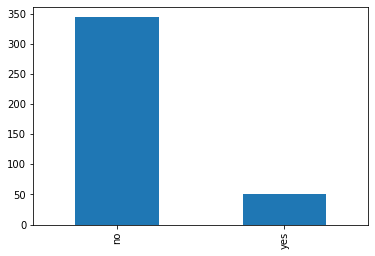

In [22]:
alcohol_consumption["schoolsup"].value_counts().plot(kind='bar')

As we can see, we can plot 'yes' and 'no' attributes into a bar chart by getting the value count of the 'yes' and 'no' values and then plot a bar graph with those numerical values.

In [23]:
alcohol_consumption.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Count, mean, std (standard deviation), min, and max rows are shown by the .describe() method.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

Initially calling .describe() on the data set only shows us the numerical data from the data set, it does not show us the categorical data. This implies that if we want to see the categorical data described, it has to be preprocessed before being described.

In [24]:
alcohol_consumption.describe(include = ["object"])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Calling .describe(include = ["object"]) shows count, unique, top and freq rows and describes non numerical data in the dataset. Count, unique and top are self explanitory.
freq shows the count of how many times the top value was present in its respective attribute.

# Histogram for each Numerical Attribute

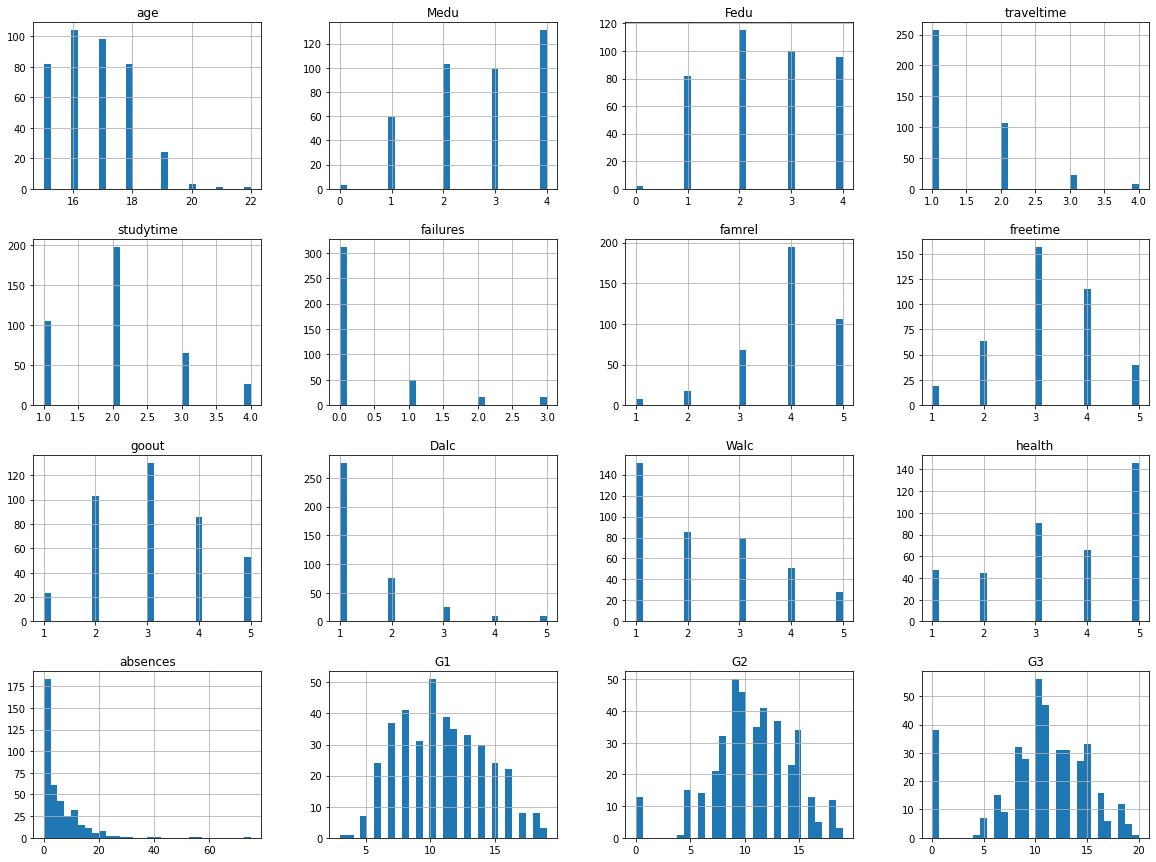

In [25]:
alcohol_consumption.hist(bins=30, figsize=(20,15))
plt.show()

From the histrogram health, we can see that 5 indicating very good health, is the largest bar in the histogram. This indicated that the majority of the students are in very good health.

From the histogram absences, we can see how many times a student has reported absent from class. From this we can see that the overwhelming majority of students have recorded 0 absences from class.

From the histogram age, we can see that the majority of the students in the maths class are in the range of 15-18 years of age.

From the histogram studytime, we can see how many hours of weekly studytime students parttake in. From this we can see that about 200 students study about 2 hours weekly.

From the histogram traveltime, we can see the home to school traveltime plotted. From this we can see that the majority (250+) of students have a traveltime of less than 15 minutes.

From the histogram freetime, we can see the amount of freetime students have. From very low indicating 1 to very high indicating 5. From this histogram, we can see that the majority of students have average to high freetime.

From the histogram goout, we can see the rate of which students go out with friends. From very low indicating 1 to very high indicating 5. From this histogram, we can see that the majority of students go out with friends 'low' to 'average' times.

From the histogram failures, we can see the amount of times a student has failed in the past. From this we can see that the majority of students have not previously failed a class and under 50 students failing more than 3 classes.

From the histogram famrel, we can see the quality of the family relationships the students have. From very low indicating 1 to very high indicating 5. From this histogram, we can see that the majority of students say they have a high family relationship and very few students (<50) have a very low family relationship.

G1, G2 and G3 are histograms which shows the students first period grade, second period grade and final grade. From G1 histogram, we can see that around 140 students got less than 50% in thier test. In the G2 histogram, we can see that the majority of students passed second period with no one getting full marks. In G3 histogram, there is a high amount of students who achieved a 0 mark in thier final grade.

G1, G2 and G3 show some multinomail distribution.

This could be due to the fact that students may have left the school, leaving them to be recorded with a final grade of 0. Given the fact that the value is recorded as 0 and not a NULL value, left me to the decision to not remove it from the dataset.

Medu and Fedu are histograms which shows us the education the students parents have. From these histograms we can see a low number of students parents have no prior education. In Medu histogram we can see that there are more students whos fathers have higher education than students who's fathers have primary education. If we then look at Medu, we can see that the difference in the amount of students who's mothers have primary education compared to higher education isn't that large.

Walc and Dalc are histograms which shows us the weekly and daily alcohol consumption of the students. From very low indicating 1 and very high indicating 5. From this histogram we can see that the majority of the students have a very low weekly and daily 
alcohol consumption.

array([[<AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='Dalc', ylabel='G1'>,
        <AxesSubplot:xlabel='Walc', ylabel='G1'>],
       [<AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='Dalc', ylabel='G2'>,
        <AxesSubplot:xlabel='Walc', ylabel='G2'>],
       [<AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='Dalc', ylabel='G3'>,
        <AxesSubplot:xlabel='Walc', ylabel='G3'>],
       [<AxesSubplot:xlabel='G1', ylabel='Dalc'>,
        <AxesSubplot:xlabel='G2', ylabel='Dalc'>,
        <AxesSubplot:xlabel='G3', ylabel='Dalc'>,
        <AxesSubplot:xlabel='Dalc', ylabel='Dalc'>,
        <AxesSubplot:xlabel='Walc', ylabel='Dalc'>],
       [<A

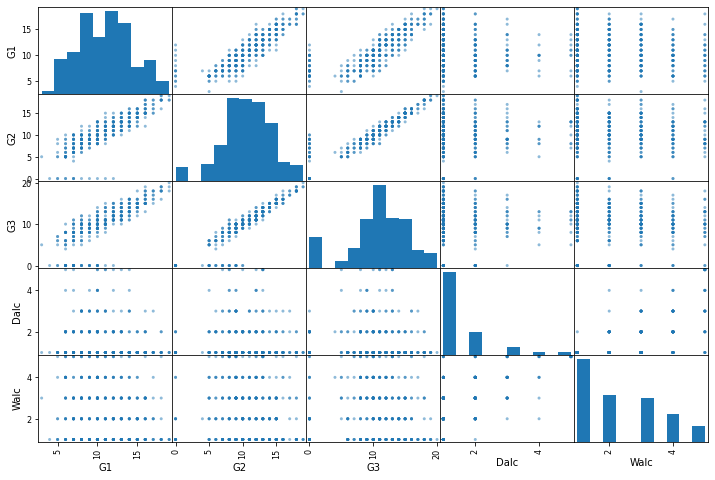

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["G1", "G2", "G3", "Dalc", "Walc"]
scatter_matrix(alcohol_consumption[attributes], figsize=(12, 8))

From this we can see there is a positive correlation between G1, G2 and G3 denoted by the scatter graphs and the plot angle.
In comparison to (G1, G2 and G3) and (Walc and Dalc) where we can see that there is no correlation between the two. 

# Handling Text and Categorical Attributes

In [27]:
alcohol = alcohol_consumption.copy()

In [28]:
alcohol_consumption_categories = alcohol[["Fjob"]]
alcohol_consumption_categories.head(10)

,Fjob
0,teacher
1,other
2,other
3,services
4,other
5,other
6,other
7,teacher
8,other
9,other


In [29]:
alcohol_consumption_categories.tail(10)

,Fjob
385,other
386,at_home
387,other
388,services
389,other
390,services
391,services
392,other
393,other
394,at_home


In [30]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
alcohol_consumption_category_encoded = ordinal_encoder.fit_transform(alcohol_consumption_categories)
alcohol_consumption_category_encoded[:10]

array([[4.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [2.],
       [4.],
       [2.],
       [2.]])

You can't feed string values into metrical functions, numerical values are the only type of values that can be passed into the metrical function. More analysation can now be done using these numerical values.

In [31]:
ordinal_encoder.categories_

[array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)]

calling ordinal_encoder.categories_ we can create a 1D of categories for the attribute "Fjob"

# Correlating Features

In [32]:
correlation_matrix = alcohol.corr()
correlation_matrix["Dalc"].sort_values(ascending=False)

Dalc          1.000000
Walc          0.647544
goout         0.266994
freetime      0.209001
traveltime    0.138325
failures      0.136047
age           0.131125
absences      0.111908
health        0.077180
Medu          0.019834
Fedu          0.002386
G3           -0.054660
G2           -0.064120
famrel       -0.077594
G1           -0.094159
studytime    -0.196019
Name: Dalc, dtype: float64

By calling .corr() to get the most correlating attributes based on the attribute specified; in this case the attribute specified is Dalc is the attribute specified. From this we can see the most correlating attributes are Walc, goout and freetime. Now we must ask ourselves, are these attributes that are the most correlating make sense?

Look at Walc, the most correlating feature, does it make sense that Walc is the most correlating feature. With a value of 0.6475 Walc isn't strongly correlating with Dalc as strongly correlating is >= 0.9.

# Feature Selection - Filter Method - Pearson's Correlation

In [33]:
##importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

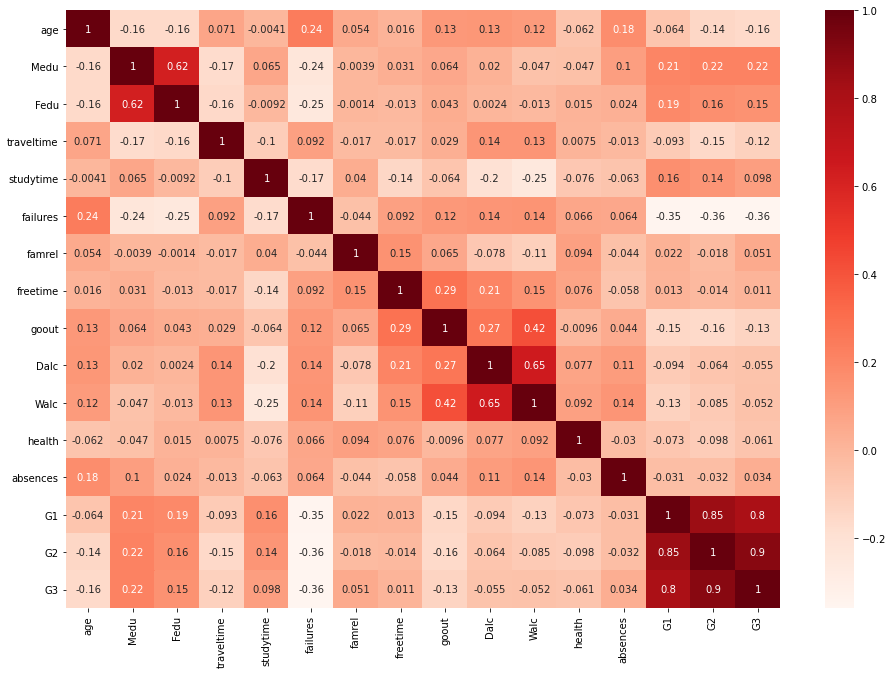

In [34]:
plt.figure(figsize=(16,11))
correlation_heat_map = alcohol.corr()
sns.heatmap(correlation_heat_map, annot=True, cmap=plt.cm.Reds)
plt.show()

This is a different way of visualising correlation. Correlation of all numerical attributes are visualised in this heatmap shown above. With the deeper shade of red indicating high correlation and the lighter shade of red indicating low correlation.

In [35]:
#Correlation with output variable
cor_target = abs(correlation_heat_map["Dalc"])
#Selecting fairly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending=False)

Dalc          1.000000
Walc          0.647544
goout         0.266994
freetime      0.209001
studytime     0.196019
traveltime    0.138325
failures      0.136047
age           0.131125
absences      0.111908
Name: Dalc, dtype: float64

From this we can see that there are 8 attributes who meet the correlation target value. We can also see that the 4 most correlating features to Dalc are 'Walc', 'goout', 'freetime' and 'studytime'.
From this we can now drop the features that didn't meet the correlation target such as 'G1', 'G2', 'G3', 'health', 'famrel', 'Fedu'and 'Medu'. 

We can also see that the correlation target is low. This is due to the fact because the dataset has a low correlation in general it would make sense to provide the cor_target with a low  cor_target value.

In [36]:
alcohol_copy = alcohol.copy()
alcohol1 = alcohol_copy.drop(columns = ["G1", "G2", "G3", "famrel", "health", "Fedu", "Medu"])

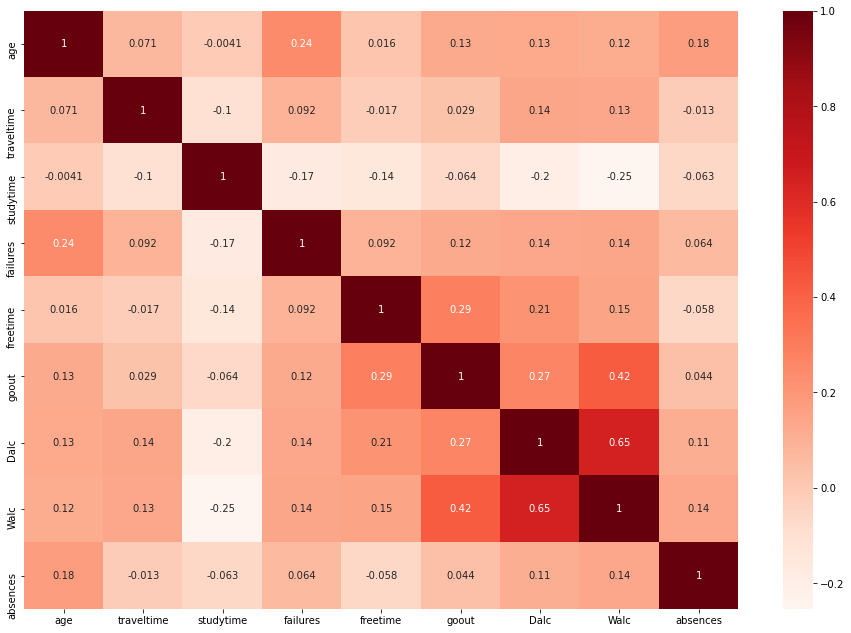

In [37]:
plt.figure(figsize=(16,11))
correlation_heat_map2 = alcohol1.corr()
sns.heatmap(correlation_heat_map2, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
#Correlation with output variable
cor_target = abs(correlation_heat_map2["Dalc"])
#Selecting strongly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features.sort_values(ascending=False)

Dalc        1.000000
Walc        0.647544
goout       0.266994
freetime    0.209001
Name: Dalc, dtype: float64

There was an increase in the cor_target value from 0.1 to 0.2. This is to allow for more attributes to be dropped from this dataset.

From this we can see the more weakly correlating attributes, which are those sitting < 0.2 . We can then remove the attributes that didn't meet the correlation target. These attributes are: 'studytime', 'traveltime', 'failures', 'age' and 'absences'. We only want the "strongly" correlating attributes.

In [39]:
alcohol_copy = alcohol1.copy()
alcohol2 = alcohol_copy.drop(columns = ["studytime", "traveltime", "failures", "age", "absences"])

In [40]:
print(alcohol2[["Walc","goout"]].corr())
print(alcohol2[["freetime","Walc"]].corr())

           Walc     goout
Walc   1.000000  0.420386
goout  0.420386  1.000000
          freetime      Walc
freetime  1.000000  0.147822
Walc      0.147822  1.000000


This is just to see the correlation between the attributes most correlating to the target attribute

In [41]:
alcohol2

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,paid,activities,nursery,higher,internet,romantic,freetime,goout,Dalc,Walc
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,...,no,no,yes,yes,no,no,3,4,1,1
1,GP,F,U,GT3,T,at_home,other,course,father,no,...,no,no,no,yes,yes,no,3,3,1,1
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,...,yes,no,yes,yes,yes,no,3,2,2,3
3,GP,F,U,GT3,T,health,services,home,mother,no,...,yes,yes,yes,yes,yes,yes,2,2,1,1
4,GP,F,U,GT3,T,other,other,home,father,no,...,yes,no,yes,yes,no,no,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,...,yes,no,yes,yes,no,no,5,4,4,5
391,MS,M,U,LE3,T,services,services,course,mother,no,...,no,no,no,yes,yes,no,4,5,3,4
392,MS,M,R,GT3,T,other,other,course,other,no,...,no,no,no,yes,no,no,5,3,3,3
393,MS,M,R,LE3,T,services,other,course,mother,no,...,no,no,no,yes,yes,no,4,1,3,4


As we can see from this when I call alcohol2. We have the most correlating features, the class attribute and then the rest of the attributes thats have not been pre processed 

# Preprocessing Categorical Attributes (and Binary)

In [42]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
#Categorical Data
alcohol['school'] = lb.fit_transform(alcohol['school'])
alcohol['sex'] = lb.fit_transform(alcohol['sex'])
alcohol['address'] = lb.fit_transform(alcohol['address'])
alcohol['famsize'] = lb.fit_transform(alcohol['famsize'])
alcohol['Pstatus'] = lb.fit_transform(alcohol['Pstatus'])
alcohol['Mjob'] = lb.fit_transform(alcohol['Mjob'])
alcohol['Fjob'] = lb.fit_transform(alcohol['Fjob'])
alcohol['reason'] = lb.fit_transform(alcohol['reason'])
alcohol['guardian'] = lb.fit_transform(alcohol['guardian'])

#Categorical Binary (Yes/No) Data
alcohol['schoolsup'] = lb.fit_transform(alcohol['schoolsup'])
alcohol['famsup'] = lb.fit_transform(alcohol['famsup'])
alcohol['paid'] = lb.fit_transform(alcohol['paid'])
alcohol['activities'] = lb.fit_transform(alcohol['activities'])
alcohol['nursery'] = lb.fit_transform(alcohol['nursery'])
alcohol['higher'] = lb.fit_transform(alcohol['higher'])
alcohol['internet'] = lb.fit_transform(alcohol['internet'])
alcohol['romantic'] = lb.fit_transform(alcohol['romantic'])
alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


From the code above we pre-process the remaining attributes in the dataset. This produces numerical values out of the categorical and binary data, which will allow us to check for correlation with all the attributes in the dataset compared to when we checked correlation in Feature Selection Section.

From this we can properly make 3 datasets in which we can perform naive bayes and calculate the metrics regarding those datasets. 

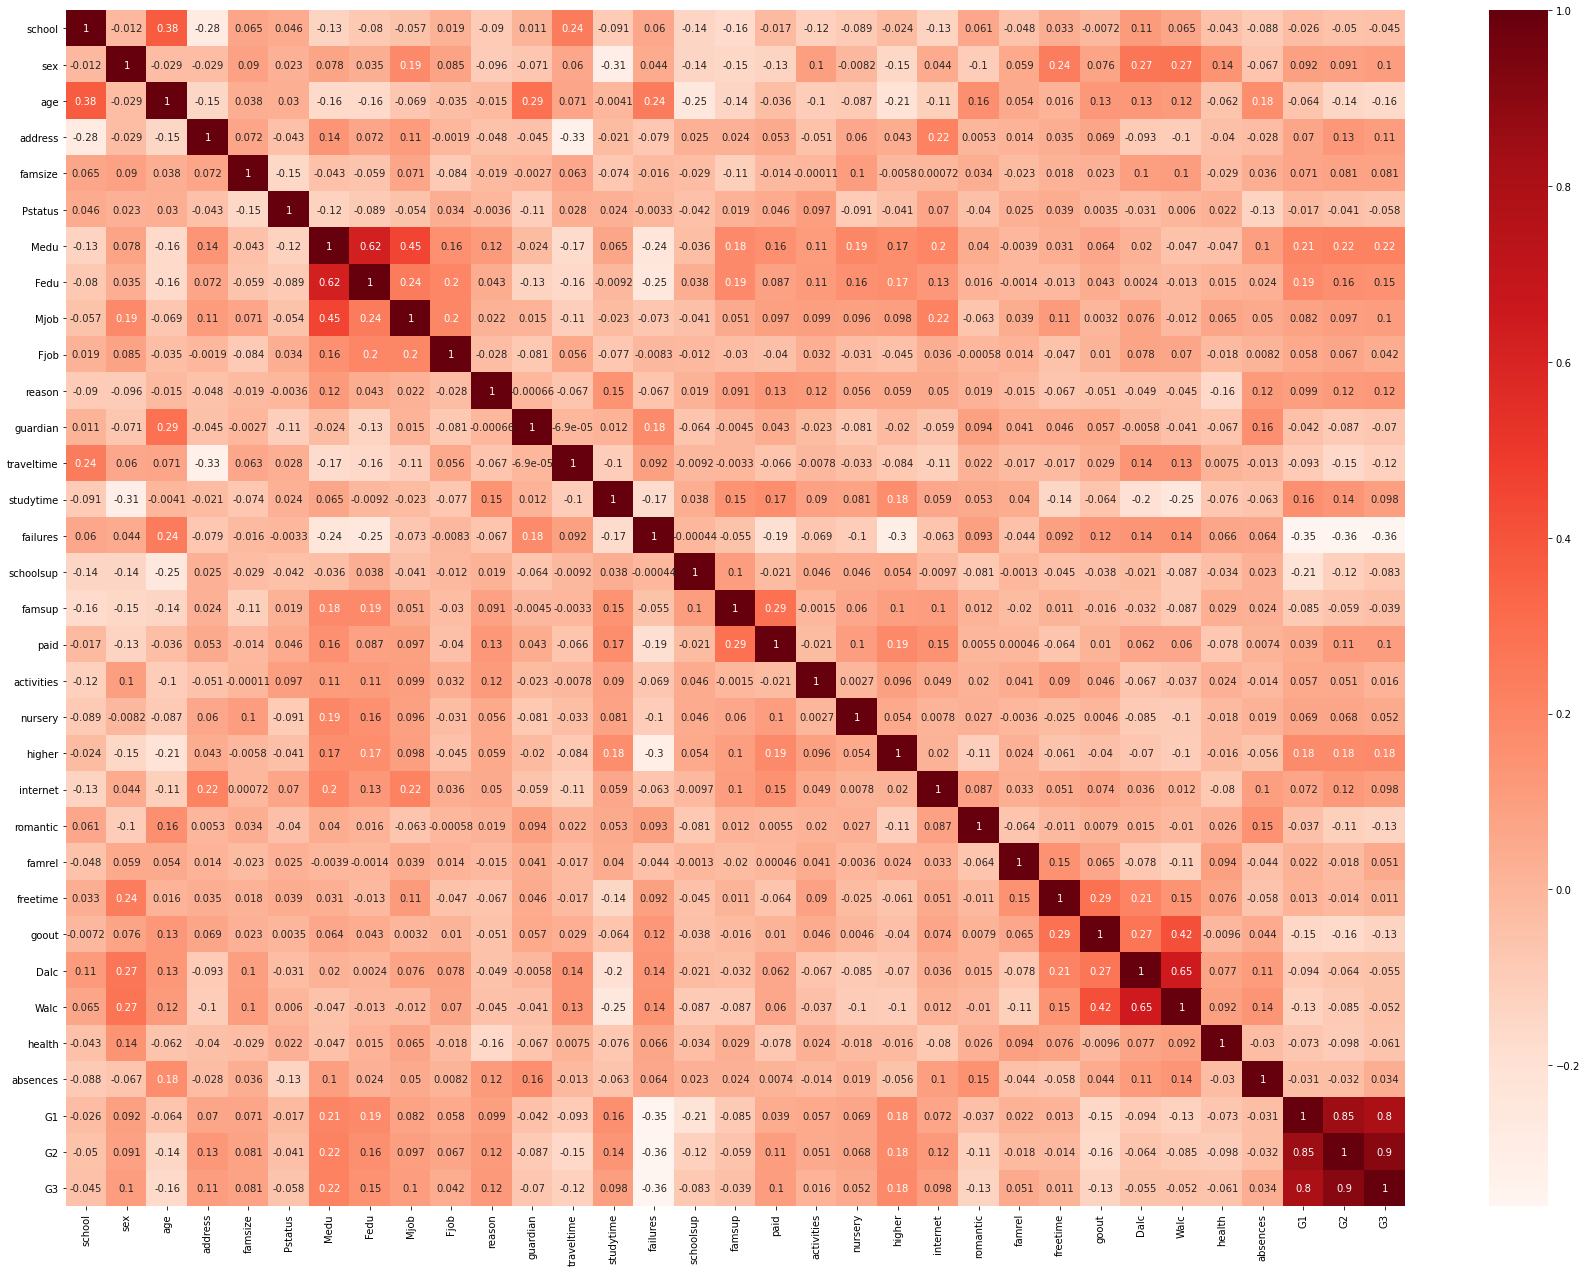

In [43]:
plt.figure(figsize=(30,22))
correlation_heat_map = alcohol.corr()
sns.heatmap(correlation_heat_map, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
#Correlation with output variable
cor_target = abs(correlation_heat_map["Dalc"])
#Selecting fairly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending=False)

Dalc          1.000000
Walc          0.647544
sex           0.268171
goout         0.266994
freetime      0.209001
studytime     0.196019
traveltime    0.138325
failures      0.136047
age           0.131125
school        0.114209
absences      0.111908
famsize       0.101521
Name: Dalc, dtype: float64

As before in the feature correlation section, we can see the relevant features that meet the correlation target. We can also see that some of the new attributes added (pre-proccessed attributes) have met the correlation target pushing out the older attributes drawn up before.

From this we can now see that there are now 10 attributes that met the correlation target, with the top 5 attributes being: "Walc", "sex", "goout", "freetime" and "studytime". 

From this we can now drop the features that didn't meet the correlation target such as 'G1', 'G2', 'G3', 'health', 'famrel', 'Fedu', 'Medu', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet' and 'romantic'.    

In [45]:
alcohol_copy = alcohol.copy()
alcohol3 = alcohol_copy.drop(columns = ['G1', 'G2', 'G3', 'health', 'famrel', 'Fedu', 'Medu', 
                                        'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                                        'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [46]:
alcohol3

,school,sex,age,address,famsize,traveltime,studytime,failures,freetime,goout,Dalc,Walc,absences
0,0,0,18,1,0,2,2,0,3,4,1,1,6
1,0,0,17,1,0,1,2,0,3,3,1,1,4
2,0,0,15,1,1,1,2,3,3,2,2,3,10
3,0,0,15,1,0,1,3,0,2,2,1,1,2
4,0,0,16,1,0,1,2,0,3,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,1,2,2,5,4,4,5,11
391,1,1,17,1,1,2,1,0,4,5,3,4,3
392,1,1,21,0,0,1,1,3,5,3,3,3,3
393,1,1,18,0,1,3,1,0,4,1,3,4,0


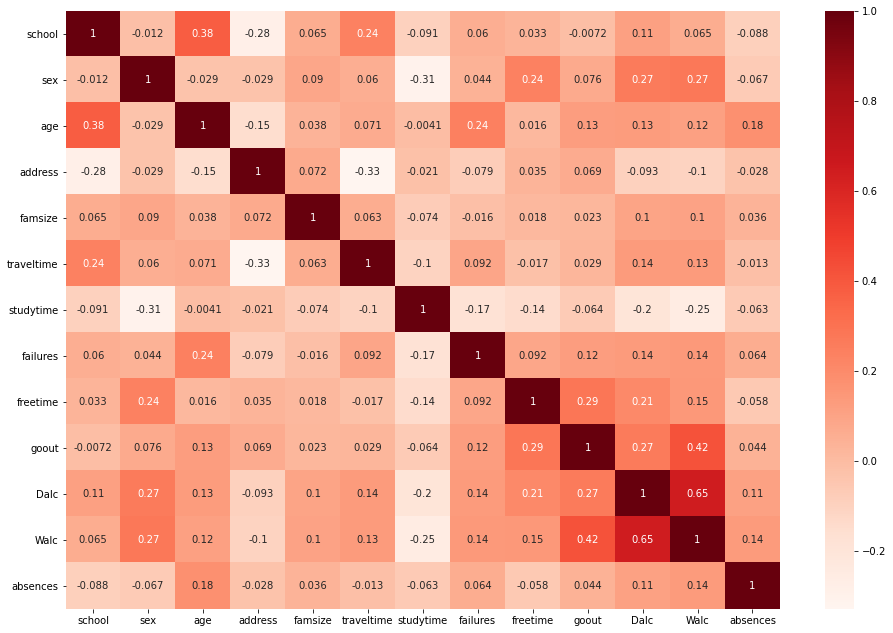

In [47]:
plt.figure(figsize=(16,11))
correlation_heat_map3 = alcohol3.corr()
sns.heatmap(correlation_heat_map3, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
#Correlation with output variable
cor_target = abs(correlation_heat_map3["Dalc"])
#Selecting strongly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features.sort_values(ascending=False)

Dalc        1.000000
Walc        0.647544
sex         0.268171
goout       0.266994
freetime    0.209001
Name: Dalc, dtype: float64

From this we can see the more weakly correlating attributes, which are those sitting < 0.2 . We can then remove the attributes that didn't meet the correlation target. These attributes are: 'studytime', 'traveltime', 'failures', 'age' and 'absences'. We only want the "strongly" correlating attributes.

In [49]:
alcohol_copy = alcohol3.copy()
alcohol4 = alcohol_copy.drop(columns = ["studytime", "traveltime", "failures", "age", "absences"])

In [50]:
print(alcohol4[["Walc","sex"]].corr())
print()
print(alcohol4[["goout","Walc"]].corr())
print()
print(alcohol4[["freetime","Walc"]].corr())

print(alcohol4[["sex","goout"]].corr())
print()
print(alcohol4[["freetime","sex"]].corr())
print()

print(alcohol4[["goout","freetime"]].corr())
print()

          Walc       sex
Walc  1.000000  0.274194
sex   0.274194  1.000000

          goout      Walc
goout  1.000000  0.420386
Walc   0.420386  1.000000

          freetime      Walc
freetime  1.000000  0.147822
Walc      0.147822  1.000000
            sex     goout
sex    1.000000  0.075897
goout  0.075897  1.000000

          freetime       sex
freetime  1.000000  0.238744
sex       0.238744  1.000000

             goout  freetime
goout     1.000000  0.285019
freetime  0.285019  1.000000



We can now check the correlation between the remaining attributes in the dataset. From this we can see that the correlation between goout and Walc is the highest.

In [51]:
alcohol4

,school,sex,address,famsize,freetime,goout,Dalc,Walc
0,0,0,1,0,3,4,1,1
1,0,0,1,0,3,3,1,1
2,0,0,1,1,3,2,2,3
3,0,0,1,0,2,2,1,1
4,0,0,1,0,3,2,1,2
...,...,...,...,...,...,...,...,...
390,1,1,1,1,5,4,4,5
391,1,1,1,1,4,5,3,4
392,1,1,0,0,5,3,3,3
393,1,1,0,1,4,1,3,4


# Naive Bayes Classifier on Datasets 

In [52]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score

After testing between Gaussian, Multinomial and Bernoulli Naive Bayes, out of the 3 Naive Bayes, GaussianNB produced the best results for score() for alcohol4 and alcohol3, MultinomialNB produced the best results for score() for alcohol.

score() is used to return the mean accuracy of the given test data. As you can see below score() is called on the different datasets.
predict() is used to predict what the class attribute values would be.


### Using Dataset alcohol4

In [53]:
alcohol_copy = alcohol4.copy()
alcohol5 = alcohol_copy.drop(columns = "Dalc")

alcohol5 dataset is alcohol4 dataset with the class attribute "Dalc" dropped.

In [54]:
clf = GaussianNB()
clf.fit(alcohol5, alcohol4["Dalc"])
y_predict = clf.predict(alcohol5[0:])
print(clf.score(alcohol5, alcohol4["Dalc"]))

0.7240506329113924


In [55]:
cross_val_score(clf, alcohol5, alcohol4["Dalc"], cv=3)

array([0.71969697, 0.68939394, 0.61832061])

The cross validation performed on this data set shows 3 scores, due to cv = 3. From this we can see that as the number of times the cross validation score is performed, the score decreases.

We can also see that the first score calculated is the closest to the score value calculated without cross validation. The rest can be said for the remaining datasets

### Using Dataset alcohol

In [56]:
alcohol_copy = alcohol.copy()
alcohol6 = alcohol_copy.drop(columns = "Dalc")

alcohol6 is alcohol dataset with the class attribute "Dalc" dropped.

In [57]:
asd = MultinomialNB()
asd.fit(alcohol6, alcohol4["Dalc"])
y1_predict = asd.predict(alcohol6[0:])
print(asd.score(alcohol6, alcohol4["Dalc"]))

0.6810126582278481


In [58]:
cross_val_score(asd, alcohol6, alcohol4["Dalc"], cv=3)

array([0.6969697 , 0.53030303, 0.51145038])

### Using Dataset alcohol3

In [59]:
alcohol_copy = alcohol3.copy()
alcohol7 = alcohol_copy.drop(columns = "Dalc")

alcohol7 is alcohol3 dataset with the class attribute "Dalc" dropped

In [60]:
iop = GaussianNB()
iop.fit(alcohol7, alcohol4["Dalc"])
y2_predict = iop.predict(alcohol7[0:])
print(iop.score(alcohol7, alcohol4["Dalc"]))

0.7139240506329114


In [61]:
cross_val_score(iop, alcohol7, alcohol4["Dalc"], cv=3)

array([0.74242424, 0.61363636, 0.58778626])

From these score() values on datasets:

alcohol as alcohol6
alcohol3 as alcohol7
alcohol4 as alcohol5

We can see that the largest dataset, alcohol - the initial dataset after preprocessing - has the lowest score value of 0.681. alcohol4, the smallest dataset, has the highest score value of 0.724 and alcohol3 the intermediate dataset had an intermediate score compared to the rest of the datasets, a score of 0.713.

From this we can say that as we perform attribute selection, and as the attributes become more strongly correlating, the score increases.

## Naive Bayes and Major Metrics on Datasets

## Dataset 1 - alcohol 

In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [63]:
y_true = alcohol4["Dalc"]
y_original_predict = asd.predict(alcohol6[0:])

#Remember alcohol6 is the original alcohol dataset
cnf_matrix = confusion_matrix(y_true, y_original_predict, labels= asd.classes_)
print(cnf_matrix)

[[239  23   0  13   1]
 [ 49  18   0   8   0]
 [ 13   5   5   3   0]
 [  2   3   0   4   0]
 [  3   1   1   1   3]]


A high .score() (accuracy) should be visualised on the confusion matrix as a strong diagonal with zeros on either side. From this we can see that there are not a multitude of zeros either side of the diagonal indicating a low accuracy score.

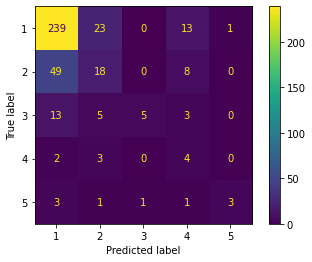

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,  display_labels=clf.classes_)
disp.plot()
plt.show()

Due to the fact that my class attribute has 5 classes, this means that the confusion matrix is a multiclass confusion matrix. 
So instead of seeing a 2x2 binary confusion matrix, we see a 5x5 confusion matrix.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 1

True Positive = 239

True Negative = (18 + 8 + 5 + 5 + 3 + 3 + 4 + 1 + 1 + 1 + 3) = 52

False Positive = (49 + 13 + 2 + 3) = 67

False Negative = (23 + 13 + 1) = 37

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 67 / (67 + 52) = 0.5630

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 239 / (239 + 37) = 0.8659

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 56% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 87% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 2

True Positive = 18

True Negative = (239 + 13 + 1 + 13 + 5 + 3 + 2 + 4 + 3 + 1 + 1 + 3) = 288

False Positive = (23 + 5 + 3 + 1) = 32

False Negative = (49 + 8) = 57

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 32 / (32 + 288) = 0.1

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 18 / (18 + 57) = 0.24

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 10% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 24% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 3

True Positive = 5

True Negative = (239 + 23 + 13 + 1 + 49 + 18 + 8 + 2 + 3 + 4 + 3 + 1 + 1 + 3) = 368

False Positive = 1

False Negative (13 + 5 + 3) = 21

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 1 / (1 + 368) = 1/369 

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 5 / (5 + 21) = 0.1923

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative less than 1% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 19% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 4

True Positive = 4

True Negative = (239 + 23 + 1 + 49 + 18 + 13 + 5 + 5 + 3 + 1 + 1 + 3) = 361

False Positive = (13 + 8 + 3 + 1) = 25

False Negative = (2 + 3) = 5

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 25 / (25 + 361) = 0.0647 

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 4 / (4 + 5) = 0.444

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 6% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 44% of the time.

#### True Positive, True Negative, False Positive and False Negative for Class Attribute value 5

True Positive = 3

True Negative = (239 + 23 + 13 + 49 + 18 + 8 + 13 + 5 + 5 + 3 + 2 + 3 + 4) = 385

False Positive = 1 

False Negative = (3 + 1 + 1 + 1) = 6

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 1 / (1 + 385) = 1/386 

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 3 / (3 + 6) = 0.3333

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative less than 1% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 33% of the time.

### Precision, Recall, F1 and Accuracy 

In [65]:
print("\nAccuracy: ", accuracy_score(y_true, y_original_predict))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_original_predict, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_original_predict, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_original_predict, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_original_predict, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_original_predict, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_original_predict, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_original_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_original_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_original_predict, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_true, y_original_predict, 
                            target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy:  0.6810126582278481
Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.57
Macro Recall: 0.42
Macro F1-score: 0.42

Weighted Precision: 0.69
Weighted Recall: 0.68
Weighted F1-score: 0.66

Classification Report

              precision    recall  f1-score   support

     Class 1       0.78      0.87      0.82       276
     Class 2       0.36      0.24      0.29        75
     Class 3       0.83      0.19      0.31        26
     Class 4       0.14      0.44      0.21         9
     Class 5       0.75      0.33      0.46         9

    accuracy                           0.68       395
   macro avg       0.57      0.42      0.42       395
weighted avg       0.69      0.68      0.66       395



F1-score also known as F-score is a measure of a models accuracy on a dataset. This shows the different types of F1-score. F1-score is basically the accuracy of the dataset but calculated with recall and precision. From this we can see that the Micro F1-score is the same as the Accuracy.

For individual classes we can see that class 1 had the highest f1 score and class 4 having the lowest.

### AUC ROC

In [66]:
roc_auc_score(y_true, asd.predict_proba(alcohol6), multi_class='ovr')

0.8057666800685113

In [67]:
roc_auc_score(y_true, asd.predict_proba(alcohol6), multi_class='ovo')

0.7333813328378547

As we know a good model will have an AUC ROC score near to 1, this means that it has a high measure of seperability. From this we can see that the AUC ROC scores are 0.8057 and 0.7333 which are near 1. This means this dataset as a good measure of seperability.

## Dataset 2 - alcohol3

In [68]:
cnf_matrix2 = confusion_matrix(y_true, y2_predict, labels= asd.classes_)
print(cnf_matrix2)

[[242  23   6   1   4]
 [ 39  22   9   0   5]
 [  5   7   9   0   5]
 [  1   3   1   0   4]
 [  0   0   0   0   9]]


A high .score() (accuracy) should be visualised on the confusion matrix as a strong diagonal with zeros on either side. From this we can see that there are not a multitude of zeros either side of the diagonal but more than Dataset 1, indicating a higher accuracy score.

We can also see that the model didnt produce any true positives for class 4

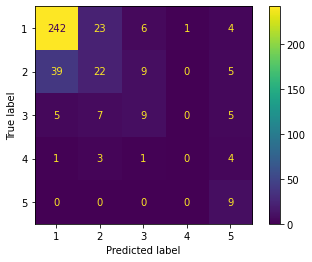

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2,  display_labels=clf.classes_)
disp.plot()
plt.show()

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 1

True Positive = 242

True Negative = (22 + 9 + 5 + 7 + 9 + 5 + 3 + 1 + 4 + 9) = 74

False Positive = (39 + 5 + 1) = 45

False Negative = (23 + 6 + 1 + 4) = 34

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 45 / (45 + 74) = 0.3781

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 242 / (242 + 34) = 0.8768

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 38% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 88% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 2

True Positive = 22

True Negative = (242 + 6 + 1 + 4 + 5 + 9 + 5 + 1 + 1 + 4 + 9) = 287

False Positive = (23 + 7 + 3) = 33

False Negative = (39 + 9 + 5) = 53

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 33 / (33 + 287) = 0.1031

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 22 / (22 + 53) = 0.2933

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 10% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 29% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 3

True Positive = 9

True Negative = (242 + 23 + 1 + 4 + 39 + 22 + 5 + 1 + 3 + 4 + 9) = 353

False Positive = (6 + 9 + 1) = 16

False Negative = (5 + 7 + 5) = 17

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 16 / (16 + 353) = 0.0433

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 9 / (9 + 17) = 0.3461

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 4% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 35% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 4

True Positive = 0

True Negative = (242 + 23 + 6 + 4 + 39 + 22 + 9 + 5 + 5 + 7 + 9 + 5 + 9) =  385

False Positive = 1

False Negative = 9

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 1 / (1 + 385) = 1/386

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 0 / (0 + 9) = 0

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative less than 1% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 0% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 5

True Positive = 9

True Negative = (242 + 23 + 6 + 1 + 39 + 22 + 9 + 5 + 7 + 9 + 1 + 3 + 1) = 368

False Positive = (4 + 5 + 5 + 4) = 18

False Negative = 0 

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 18 / (18 + 368) = 0.0469

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 9 / (9 + 0) = 1

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 5% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 100% of the time.

### Precision, Recall, F1 and Accuracy 

In [70]:
print("\nAccuracy: ", accuracy_score(y_true, y2_predict))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y2_predict, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y2_predict, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y2_predict, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y2_predict, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y2_predict, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y2_predict, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y2_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y2_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y2_predict, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_true, y2_predict, 
                            target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy:  0.7139240506329114
Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.39
Macro Recall: 0.50
Macro F1-score: 0.41

Weighted Precision: 0.70
Weighted Recall: 0.71
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

     Class 1       0.84      0.88      0.86       276
     Class 2       0.40      0.29      0.34        75
     Class 3       0.36      0.35      0.35        26
     Class 4       0.00      0.00      0.00         9
     Class 5       0.33      1.00      0.50         9

    accuracy                           0.71       395
   macro avg       0.39      0.50      0.41       395
weighted avg       0.70      0.71      0.70       395



For individual classes we can see that class 1 had the highest f1 score and class 4 having the lowest. With class 4 not having any values for precision recall and f1-score due to the fact the model did not predict any true positive values for the class.

### AUC ROC

In [71]:
roc_auc_score(y_true, iop.predict_proba(alcohol7), multi_class='ovr')

0.8638888380695839

In [72]:
roc_auc_score(y_true, iop.predict_proba(alcohol7), multi_class='ovo')

0.8478366262025683

From this we can see that the AUC ROC scores are 0.8638 and 0.8478 which are near 1. This means this dataset as a good measure of seperability. This dataset alcohol3 has a higher measure of seperability than dataset alcohol.

## Dataset 3 - alcohol4

In [73]:
cnf_matrix3 = confusion_matrix(y_true, y_predict, labels= asd.classes_)
print(cnf_matrix3)

[[244  20   8   0   4]
 [ 38  24   8   0   5]
 [  3   8   9   0   6]
 [  1   3   1   0   4]
 [  0   0   0   0   9]]


Just like Dataset 2, we can also see that the model didnt produce any true positives for class 4

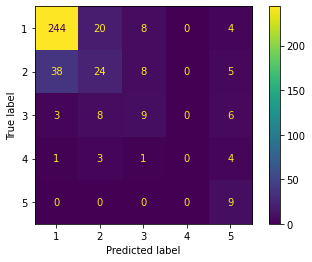

In [74]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix3,  display_labels=clf.classes_)
disp.plot()
plt.show()

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 1

True Positive = 244

True Negative = (24 + 8 + 5 + 8 + 9 + 6 + 3 + 1 + 4 + 9) = 77

False Positive = (38 + 3 + 1) = 42

False Negative = (20 + 8 + 4) = 32

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 42 / (42 + 77) = 0.3529

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 244 / (244 + 32) = 0.8840

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 35% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 88% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 2

True Positive = 24

True Negative = (244 + 8 + 4 + 3 + 9 + 6 + 1 + 1 + 4 + 9) = 289

False Positive = (20 + 8 + 3) = 31

False Negative = (38 + 8 + 5) = 51

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 31 / (31 + 289) = 0.0968

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 24 / (24 + 51) = 0.32

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 10% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 32% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 3

True Positive = 9

True Negative = (244 + 20 + 4 + 38 + 24 + 5 + 1 + 3 + 4 + 9) = 352

False Positive = (8 + 8 + 1) = 17

False Negative = (3 + 8 + 6) = 17

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 17 / (17 + 352) = 0.0460

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 9 / (9 + 17) = 0.3461

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 5% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 35% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 4

True Positive = 0

True Negative = (244 + 20 + 8 + 4 + 38 + 24 + 8 + 5 + 3 + 8 + 9 + 6 + 9) = 386

False Positive = 0

False Negative = (1 + 3 + 1 + 4) = 9

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 0 / (0 + 386) = 0

True Positive Rate (TPR) = True Positive / (True Positive + False Negative) = 0 / (0 + 9) = 0

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 0% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 0% of the time.

#### True Positive, True Negative, False Positive and False Negative for for Class Attribute value 5

True Positive = 9

True Negative = (244 + 20 + 8 + 38 + 24 + 8 + 3 + 8 + 9 + 1 + 3 + 1) = 367

False Positive = (4 + 5 + 6 + 4) = 19

False Negative = 0

False Positive Rate (FPR) = False Positive / (False Positive + True Negative) = 19 / (19 + 367) = 0.0492

True Positive Rate (TPR) = True Positive  / (True Positive + False Negative) = 9 / (9 + 0) = 1

FPR is the probability that a true positive will be missed. So from this confusion matrix and my calculations based on it, a true positive will test negative 5% of the time.

TPR is the probability that an actual positive will test positive. So from this confusion matrix and my calculations based on it, a true positive will test positive 100% of the time.

### Precision, Recall, F1 and Accuracy

In [75]:
print("\nAccuracy: ", accuracy_score(y_true, y_predict))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_predict, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_predict, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_predict, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_predict, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_predict, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_predict, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_predict, average='weighted', zero_division=1)))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_predict, average='weighted', zero_division=1)))

print('\nClassification Report\n')
print(classification_report(y_true, y_predict, 
                            target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy:  0.7240506329113924
Micro Precision: 0.72
Micro Recall: 0.72
Micro F1-score: 0.72

Macro Precision: 0.39
Macro Recall: 0.51
Macro F1-score: 0.41

Weighted Precision: 0.73
Weighted Recall: 0.72
Weighted F1-score: 0.71

Classification Report

              precision    recall  f1-score   support

     Class 1       0.85      0.88      0.87       276
     Class 2       0.44      0.32      0.37        75
     Class 3       0.35      0.35      0.35        26
     Class 4       0.00      0.00      0.00         9
     Class 5       0.32      1.00      0.49         9

    accuracy                           0.72       395
   macro avg       0.39      0.51      0.41       395
weighted avg       0.71      0.72      0.71       395



C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classifi

For individual classes we can see that class 1 had the highest f1 score and class 4 having the lowest. With class 4 not having any values for precision recall and f1-score due to the fact the model did not predict any true positive values for the class.

### AUC ROC

In [76]:
roc_auc_score(y_true, clf.predict_proba(alcohol5), multi_class='ovr')

0.8182570803822191

In [77]:
roc_auc_score(y_true, clf.predict_proba(alcohol5), multi_class='ovo')

0.8070254448986333

From this we can see that the AUC ROC scores are 0.8182 and 0.8070 which are near 1. This means this dataset as a good measure of seperability. This dataset alcohol4 has a higher measure of seperability than dataset alcohol but a lower measure of seperability than dataset alcohol3.

# Conclusion 

Firstly from initial data visualisation, I have come to the conclusion that my dataset is more simplistic than at first glance. 

Secondly, my inital prediction of use of preprocessing categorical data was correct - as seen Handling Text and Categorical Attributes - as the change from categorical to numerical will allow for the future production of a statistical conclusion.

I have also come to the conclusion that this dataset as a whole has weekly correlating numerical data. The data that doesnt require preprocessing doesn't correlate strongly with eachother. Also after the use of pre-processing - as it was initially mentioned - the most correlating attributes to the target attribute 'Dalc' signifying the students daily alcohol consumption, did change, but not by a significant amount. It changed from 'Walc', 'goout' and 'freetime' to 'Walc', 'sex' and 'goout'. This means that the pre-processed data affected the final result of the correlation matrix. 

After performing attribute selection on the dataset, 2 more datasets from the original data set was created. From these datasets we were able to see the most correlating features to the class attribute. We are also able to perform calculations like naive bayes to figure out important metrics from the datasets.

As the datasets got smaller the TPR increased ever so slightly. also the FPR decreased ever so slightly as well. This correlates with the score of the datasets increasing as the size reduced, keeping the more correlating features. This was then confirmed with the accuracy seen on each of the datasets.

From this we can see that the dataset alcohol4 has the best accuracy score but dataset alcohol3 has the best AUC ROC score. we can also see that in dataset alcohol4, as well as dataset alcohol3, the classifier could not predict any values for the class 4, visualised in its confusion matrix. This caused an error for when metrics like precision and F1-score were needed to be attained. calling zero-division did not change the outcome.

# Part 2 - Clustering

## Producing Clusters

In [78]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [79]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_cluster = kmeans.fit_predict(alcohol5)

KMeans clustering is performed on dataset alcohol5. 

alcohol5 is alcohol4 with the class attribute dropped. Initially 5 clusters are used for KMeans.
kmeans stores the KMeans class on the amount of clusters specified and the random state.
The random state determines random number generation for centroid initialization so in the case of the tutorial 42 was used so i used 42 also.

Changing the random state can affect the clustering but for the portfolio purposes all of the clusterings will be done with a random state of 42

kmeans.fit_predict is called on dataset alcohol5 to train cluster model on alcohol5

In [80]:
y_pred_cluster

array([4, 2, 3, 0, 2, 2, 4, 0, 0, 2, 2, 0, 3, 2, 2, 4, 0, 2, 1, 0, 2, 2,
       2, 1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 0, 1, 0, 2, 4, 3, 2, 1, 3, 1, 4, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2,
       3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 3, 2, 4, 3, 3, 1, 4, 3,
       2, 3, 3, 1, 3, 2, 4, 0, 2, 4, 4, 4, 1, 2, 2, 4, 4, 2, 0, 2, 1, 4,
       2, 0, 0, 2, 2, 4, 2, 2, 3, 2, 0, 4, 0, 1, 4, 4, 2, 2, 2, 1, 0, 2,
       1, 3, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 4, 2, 2, 2, 2, 1, 1, 1, 0, 4,
       0, 4, 3, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 4, 2, 1, 2, 1, 4, 4, 1,
       1, 1, 3, 0, 3, 0, 3, 3, 0, 3, 2, 0, 3, 3, 2, 2, 1, 3, 2, 2, 0, 1,
       3, 2, 1, 3, 1, 2, 4, 3, 2, 2, 3, 2, 2, 1, 4, 1, 0, 1, 1, 3, 3, 2,
       4, 4, 2, 3, 2, 2, 3, 3, 3, 0, 0, 2, 1, 3, 2, 3, 3, 2, 0, 1, 1, 3,
       4, 2, 4, 2, 0, 1, 3, 3, 1, 3, 1, 3, 3, 4, 0, 2, 4, 2, 0, 2, 2, 0,
       2, 1, 1, 4, 1, 4, 1, 1, 2, 2, 2, 1, 0, 3, 4, 0, 1, 1, 0, 4, 4, 2,
       2, 2, 3, 2, 3, 0, 2, 0, 2, 3, 3, 4, 2, 2, 4,

In [81]:
y_pred_cluster is kmeans.labels_

True

In [82]:
kmeans.cluster_centers_

array([[0.15      , 0.25      , 0.75      , 0.28333333, 1.73333333,
        2.2       , 1.6       ],
       [0.14473684, 0.64473684, 0.73684211, 0.35526316, 3.97368421,
        4.5       , 3.97368421],
       [0.06766917, 0.48120301, 0.80451128, 0.23308271, 3.52631579,
        2.41353383, 1.34586466],
       [0.16883117, 0.58441558, 0.74025974, 0.32467532, 3.05194805,
        2.88311688, 3.42857143],
       [0.08163265, 0.28571429, 0.85714286, 0.28571429, 3.42857143,
        4.30612245, 1.30612245]])

By calling clusters_centers_ on kmeans we can see the 5 clusters produced on the 7 attributes present in the dataset

In [83]:
kmeans.labels_

array([4, 2, 3, 0, 2, 2, 4, 0, 0, 2, 2, 0, 3, 2, 2, 4, 0, 2, 1, 0, 2, 2,
       2, 1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 0, 1, 0, 2, 4, 3, 2, 1, 3, 1, 4, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2,
       3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 3, 2, 4, 3, 3, 1, 4, 3,
       2, 3, 3, 1, 3, 2, 4, 0, 2, 4, 4, 4, 1, 2, 2, 4, 4, 2, 0, 2, 1, 4,
       2, 0, 0, 2, 2, 4, 2, 2, 3, 2, 0, 4, 0, 1, 4, 4, 2, 2, 2, 1, 0, 2,
       1, 3, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 4, 2, 2, 2, 2, 1, 1, 1, 0, 4,
       0, 4, 3, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 4, 2, 1, 2, 1, 4, 4, 1,
       1, 1, 3, 0, 3, 0, 3, 3, 0, 3, 2, 0, 3, 3, 2, 2, 1, 3, 2, 2, 0, 1,
       3, 2, 1, 3, 1, 2, 4, 3, 2, 2, 3, 2, 2, 1, 4, 1, 0, 1, 1, 3, 3, 2,
       4, 4, 2, 3, 2, 2, 3, 3, 3, 0, 0, 2, 1, 3, 2, 3, 3, 2, 0, 1, 1, 3,
       4, 2, 4, 2, 0, 1, 3, 3, 1, 3, 1, 3, 3, 4, 0, 2, 4, 2, 0, 2, 2, 0,
       2, 1, 1, 4, 1, 4, 1, 1, 2, 2, 2, 1, 0, 3, 4, 0, 1, 1, 0, 4, 4, 2,
       2, 2, 3, 2, 3, 0, 2, 0, 2, 3, 3, 4, 2, 2, 4,

## Decision Boundaries

In [84]:
alcohol_boundaries = alcohol5.copy()

In [85]:
alcohol_boundaries = alcohol_boundaries.drop(columns = ["sex", "school", "address", "famsize", "freetime"])

A new dataset is created from alcohol5 dataset in part1 called alcohol_boundaries. This dataset has the attributes "sex", "school", "address", "famsize" and "freetime" dropped to leave only "goout" and "Walc". With this decision boundaries can be plotted.

In [86]:
alcohol_boundaries

,goout,Walc
0,4,1
1,3,1
2,2,3
3,2,1
4,2,2
...,...,...
390,4,5
391,5,4
392,3,3
393,1,4


In [87]:
k = 5
kmeans_boundaries = KMeans(n_clusters=k, random_state=42)
y_pred_cluster_boundaries = kmeans_boundaries.fit_predict(alcohol_boundaries)

KMeans clustering is performed on dataset alcohol_boundaries. Initially 5 clusters are used for KMeans as with alcohol5.
kmeans_boundaries stores the KMeans function on the amount of clusters specified.

kmeans_boundaries.fit_predict is called on dataset alcohol_boundaries to predict the labels for those clusters

In [88]:
y_pred_cluster_boundaries

array([2, 2, 4, 1, 1, 1, 2, 2, 1, 1, 2, 1, 4, 2, 1, 0, 2, 1, 3, 4, 1, 1,
       4, 3, 1, 4, 1, 3, 2, 3, 4, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 4, 2, 1,
       2, 1, 3, 1, 2, 2, 4, 2, 3, 0, 3, 2, 1, 1, 1, 2, 0, 3, 2, 3, 3, 2,
       3, 2, 4, 4, 1, 2, 3, 1, 4, 4, 2, 4, 1, 2, 4, 1, 2, 4, 4, 0, 0, 4,
       1, 3, 4, 0, 4, 2, 2, 1, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 1, 2, 3, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 3, 2, 2, 0, 1, 3, 2, 0, 1, 1, 2, 3, 1, 2,
       0, 4, 2, 2, 3, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 3, 3, 3, 4, 2,
       1, 2, 4, 3, 1, 3, 1, 3, 3, 4, 3, 1, 3, 2, 0, 1, 3, 1, 0, 0, 0, 3,
       3, 3, 4, 2, 4, 2, 4, 4, 1, 0, 2, 2, 4, 3, 2, 2, 3, 4, 2, 1, 2, 3,
       0, 1, 3, 4, 0, 1, 0, 4, 2, 1, 4, 1, 2, 3, 2, 3, 1, 0, 3, 3, 4, 2,
       0, 2, 1, 3, 1, 2, 0, 4, 4, 2, 2, 1, 0, 3, 1, 4, 4, 1, 1, 3, 3, 4,
       0, 1, 2, 2, 1, 3, 4, 4, 3, 4, 3, 4, 4, 0, 2, 1, 0, 1, 4, 1, 1, 2,
       2, 3, 3, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 3, 2, 2, 3, 3, 1, 2, 0, 2,
       2, 2, 0, 2, 4, 1, 2, 1, 1, 4, 0, 0, 2, 1, 2,

In [89]:
kmeans_boundaries.cluster_centers_

array([[4.43636364, 2.4       ],
       [1.81372549, 1.32352941],
       [3.23636364, 1.33636364],
       [4.40322581, 4.41935484],
       [2.57575758, 3.28787879]])

By calling clusters_centers_ with kmeans_boundaries we can see the 5 clusters produced on the 2 attributes present in the dataset

In [90]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

These functions allow us to visualise how the KMeans algorithm assigns each instance of a given dataset to a cluster.
These functions then are used below to see how the model is clustering alcohol_boundaries

In the plot_data function, illoc is used to get rid of the slicing error message

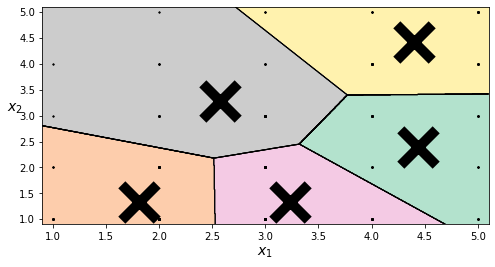

In [91]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_boundaries, alcohol_boundaries)
plt.show()

plot_decision_boundaries is called with the kmeans_boundaries and dataset alcohol_boundaries to produce this decision boundaries visualisation. 

Because the numerical data present in the dataset alcohol_boundaries are uniform (either 1, 2, 3, 4, or 5) the distribution in the visualisation is also uniform (equal) as seen with the equal pattern of dots on the graph. 

This however doesnt prevent the algorithmn from creating clusters.

alcohol_boundaries was created just to visualise the clusters as the given functions did not allow for a dataset with more than 2 attributes

## Hard Clustering and Soft Clustering

### Soft Clustering

Soft Clustering is when there is a probability or likelihood of an instance of the dataset to be in one of the clusters assigned.

#### GMM Clustering

In [92]:
from sklearn.mixture import GaussianMixture

In [93]:
gaussianMixture = GaussianMixture(n_components= 7, random_state=42)
y_pred_cluster_gaussian = gaussianMixture.fit_predict(alcohol5)

n_components is set to 7 as there are 7 attributes in the dataset alcohol5

In [94]:
gaussianMixture.means_

array([[0.        , 0.42966823, 0.78498637, 0.25014331, 3.07340987,
        2.76179379, 1.63624135],
       [0.23318864, 0.44891699, 0.76681136, 0.30827818, 3.55758262,
        3.47605987, 3.5192022 ],
       [0.5       , 0.75      , 1.        , 0.5       , 3.75      ,
        2.5       , 4.        ],
       [1.        , 0.33699085, 0.71035669, 0.49757481, 2.23848565,
        2.29399091, 1.99134388],
       [0.33333333, 0.66666667, 0.33333333, 0.33333334, 2.5       ,
        4.16666667, 4.66666667],
       [0.63651573, 0.272568  , 0.90907393, 0.54550659, 3.81797213,
        3.99992247, 1.        ],
       [0.03572293, 1.        , 0.78566542, 0.3214688 , 4.03567274,
        4.96427707, 4.21445852]])

In [95]:
gaussianMixture.score(alcohol5)

0.582327215069363

In [96]:
gaussianMixture_boundaries = GaussianMixture(n_components= 2, random_state=42)
y_pred_cluster_gaussian_boundaries = gaussianMixture_boundaries.fit_predict(alcohol_boundaries)

n_components is set to 2 as there are 2 attributes in the dataset alcohol_boundatires

In [97]:
gaussianMixture_boundaries.means_

array([[2.76790925, 1.26997403],
       [3.46425705, 3.35556722]])

In [98]:
gaussianMixture_boundaries.score(alcohol_boundaries)

-2.919121697664908

##### Pros and Cons

Pros 

- It is the fastest algorithm for learning mixture models.

- As this algorithm maximizes only the likelihood, it does not bias the means towards zero, or bias the cluster sizes. This means that the clusters do not have a specific structure.

Cons

- Gaussian Mixture Model will always use all the components it has access to.
- Difficult to interpret 

#### Agglomerative Hierarchical Clustering

Hierarchical Clustering is an unsupervised clustering algorithm that creates clusters and can order them from top to bottom.

Hierarchical Clustering can be split into two types:
- Agglomerative Hierarchical Clustering
- Divisive Hierarchical Clustering

Agglomerative Hierachical Clustering is the most common out of the two and works by grouping instances into clusters based on similiarity and has a bottom up approach:

Bottom up approach:

each observation of the similarities forms thier own cluster, and then pairs of clusters are merged as you move up the hierarchy. because of this you could say Agglomerative Hierachical Clustering is Soft Clustering.

How it works:

- Makes each data point (instances) its own cluster
- Then it takes the closest data points (instances) and makes them one cluster
- This process is then repeated to then produce another cluster from those clusters until only one cluster is left

In [99]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

Function to allow hierachical clustering to be visualised by the use of a dendogram

In [100]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [101]:
aggloClustering = AgglomerativeClustering().fit_predict(alcohol5)
aggloClustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [102]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(alcohol5)

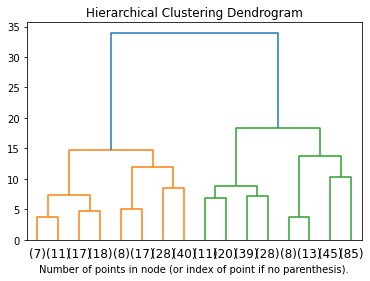

In [103]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [104]:
aggloClusteringBoundaries = AgglomerativeClustering().fit_predict(alcohol_boundaries)
aggloClusteringBoundaries

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [105]:
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model1 = model1.fit(alcohol_boundaries)

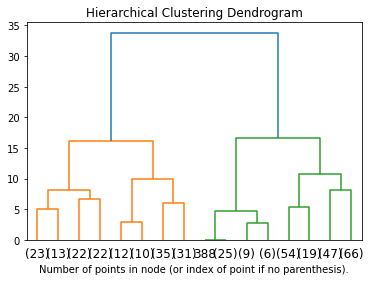

In [106]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

##### Pros and Cons

Pros

- The number of clusters does not need to be specified when running the algorithm as seen from the examples above.
- dendongram makes it easy to visualise and understand the data

Cons

- It doeesn't work well with a large dataset
- Dendogram can be misinterpreted to select the nnumber of clusters

### Hard Clustering

Hard Clustering is when each instance in a dataset either belongs to a cluster entirely or it doesn't at all.

#### KMeans Clustering

In [107]:
kmeans.transform(alcohol5)

array([[2.33071281, 3.2669492 , 1.80060668, 2.77326708, 0.74928815],
       [1.68292074, 3.5599097 , 1.03404646, 2.54111079, 1.47433973],
       [2.06532214, 3.01126118, 2.01164005, 1.36376004, 2.99833356],
       ...,
       [3.89857524, 2.40379288, 2.66304496, 2.34716683, 3.0355385 ],
       [3.833913  , 3.75069246, 3.41184417, 2.57663778, 4.59482896],
       [2.12890165, 2.90449909, 2.67852856, 1.64042991, 2.91551166]])

In [108]:
kmeans_boundaries.transform(alcohol_boundaries)

array([[1.46642873, 2.21008315, 0.83443453, 3.44304786, 2.69496861],
       [2.00577678, 1.22960095, 0.41110615, 3.69608309, 2.3268801 ],
       [2.50915678, 1.68678743, 2.07274721, 2.79106833, 0.64371654],
       ...,
       [1.55664398, 2.05372852, 1.68034333, 1.9958985 , 0.51269468],
       [3.79059297, 2.79743525, 3.47797082, 3.4289655 , 1.72919882],
       [1.55664398, 2.05372852, 1.68034333, 1.9958985 , 0.51269468]])

Each instance is given a score per cluster with the score being the distance between a datasets instance and all the centroids. 

.transform() is called on the datasets alcohol5 and alcohol_boundaries to get those instances.

##### Pros and Cons

Pros 

- KMeans is easy to implement

- Kmeans Generalizes to clusters of different shapes and sizes, such as elliptical clusters or circles.

Cons

- You have to choose the number of K Clusters manually. This can be worked around with the use of a cluster number optimiser

- Clustering outliers: the centroids can be thrown off by outliers. in turn outliers can create their own clusters accidentally. outliers should be dropped to prevent this before clustering

#### Inertia

Since KMeans is unsupervised we can not use labels to check which model is the best. in this case we use inertia as a metric for performance.

Inertia is the mean sqaured distance between each datasets instance and its closest centroid.
Inertia can be calculated by calling inertia_ on kmeans and kmeans_boundaries

In [109]:
kmeans.inertia_

775.9934072193474

In [110]:
kmeans_boundaries.inertia_

206.5883215456274

From this we can see that the dataset with less attributes has a lower inertia value.

Since inertia is not a normalised metric, all we know from this is that the lower the inertia value, the better the model, with 0 being the most optimal.

From that we could now say that kmeans_boundaries is better than kmeans. But this is still based on the number of clusters, which have not been optimised yet.

#### Score

In [111]:
kmeans.score(alcohol5)

-775.9934072193474

In [112]:
kmeans_boundaries.score(alcohol_boundaries)

-206.58832154562748

Kmeans clustering can also be evaluated using the metric score, which is the negative value of the inertia value

## Manually Changing the number of Clusters 

### K = 8

In [113]:
k = 8
kmeans_boundaries_8 = KMeans(n_clusters=k, random_state=42)
y_pred_cluster_boundaries_8 = kmeans_boundaries_8.fit_predict(alcohol_boundaries)

In [114]:
kmeans_boundaries_8.cluster_centers_

array([[1.81372549, 1.32352941],
       [4.40322581, 4.41935484],
       [4.3       , 1.3       ],
       [3.        , 2.        ],
       [3.        , 3.16666667],
       [1.83333333, 3.5       ],
       [3.        , 1.        ],
       [4.29032258, 3.        ]])

In [115]:
kmeans_boundaries_8.inertia_

122.35420619860825

From this we can see that increasing the number of clusters reduced the inertia value in dataset alcohol_boundaries

In [116]:
k = 8
kmeans_8 = KMeans(n_clusters=k, random_state=42)
y_pred_cluster_8 = kmeans_8.fit_predict(alcohol5)

In [117]:
kmeans_8.cluster_centers_

array([[0.10810811, 0.18918919, 0.81081081, 0.27027027, 3.32432432,
        4.2972973 , 1.13513514],
       [0.09090909, 0.61818182, 0.78181818, 0.27272727, 4.30909091,
        2.32727273, 1.29090909],
       [0.1       , 0.73333333, 0.63333333, 0.33333333, 2.5       ,
        4.23333333, 4.4       ],
       [0.06060606, 0.34848485, 0.90909091, 0.24242424, 2.60606061,
        3.06060606, 1.54545455],
       [0.12      , 0.32      , 0.69333333, 0.25333333, 2.30666667,
        1.82666667, 1.4       ],
       [0.18333333, 0.53333333, 0.71666667, 0.38333333, 3.21666667,
        2.61666667, 3.31666667],
       [0.08823529, 0.85294118, 0.85294118, 0.38235294, 4.38235294,
        4.52941176, 4.35294118],
       [0.18421053, 0.42105263, 0.81578947, 0.21052632, 4.10526316,
        4.31578947, 2.78947368]])

In [118]:
kmeans_8.inertia_

623.224283247503

From this we can see that increasing the number of clusters reduced the inertia value in dataset alcohol5

### K = 3

In [119]:
k = 3
kmeans_boundaries_3 = KMeans(n_clusters=k, random_state=42)
y_pred_cluster_boundaries_3 = kmeans_boundaries_3.fit_predict(alcohol_boundaries)

In [120]:
kmeans_boundaries_3.cluster_centers_

array([[3.83216783, 3.73426573],
       [3.48507463, 1.3880597 ],
       [1.80508475, 1.56779661]])

In [121]:
kmeans_boundaries_3.inertia_

378.63974692143216

From this we can see that when the number of clusters is 3, the inertia is 378. This value is higher than 122 when the number of clusters was 8. The inertia value is also higher than 206 when the number of clusters was 5. This can lead us to beleive that as the number of clusters increases, the inertia value decreases.

In [122]:
k = 3
kmeans_3 = KMeans(n_clusters=k, random_state=42)
y_pred_cluster_3 = kmeans_3.fit_predict(alcohol5)

In [123]:
kmeans_3.cluster_centers_

array([[0.11811024, 0.37007874, 0.7480315 , 0.27559055, 2.5984252 ,
        1.97637795, 1.61417323],
       [0.15602837, 0.63829787, 0.74468085, 0.34751773, 3.56737589,
        3.82978723, 3.75177305],
       [0.07086614, 0.39370079, 0.84251969, 0.23622047, 3.50393701,
        3.44094488, 1.34645669]])

In [124]:
kmeans_3.inertia_

1016.6588484950023

The same can also be seen from this, therefore we can make the same assumption

## Finding the Optimal Number of Clusters

### Types of Cluster Optimisation

#### Elbow Method

The elbow method is an empirical method used to find the optimal number of clusters in a given dataset.
This method involves selecting a range of values for K, K being the number of clusters.

Then K-Means is then performed on each of the K values.

From this the average distance from an instance of the dataset to a centroid is found and then plotted.

To find the optimal of K, pick the K value where the average distance drops off suddenly hence the name "elbow method".

#### Silhouette Method - Silhouette Coefficient

The silhouette method is a method used to find the optimal number of clusters and validation of consistency within the clusters of data.

The silhouette method calculates silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters.

The silhouette value is a measure of how similar an instance is to its own cluster compared to other clusters.

If an instance is similar to its own cluster it is called cohesion. If an instance is not similar to other clusters it is called seperation.

The value of the silhouette ranges between [1, -1], where a high value shows that the instance is well matched to its own cluster and poorly matched to the other clusters surrounding.


If most instances have a high value, then the clustering configuration is appropriate. 
If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.


The Silhoutte Coefficient can be calculated by:

average_distance = Computing the average distance of a point with all other points in the same clusters.
average_distance Computing the average distance of a point with all the points in the closest cluster to its cluster.
Compute the silhouette coefficient using the formula



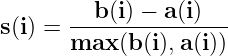

After computing the silhouette coefficient for each point, the silhouette score can be calculated by averaging out the silhouette coefficient.

in sklearn silhouette score can be calcuated by calling the silhouette_score method.

### Elbow Method

In [125]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(alcohol5)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


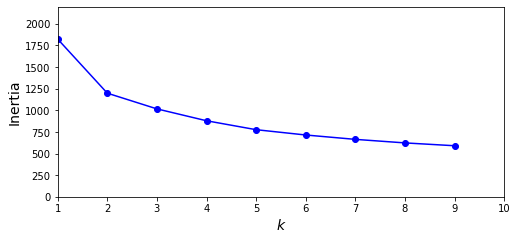

In [126]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 10, 0, 2200])
plt.show()

From this graph you can see that there is a sharp decline at K=2. We can then conclude that the optimal number of clusters for dataset alcohol5 is 2 clusters.

In [127]:
kmeans_per_k1 = [KMeans(n_clusters=k, random_state=42).fit(alcohol_boundaries)
                for k in range(1, 10)]
inertias1 = [model.inertia_ for model in kmeans_per_k1]

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


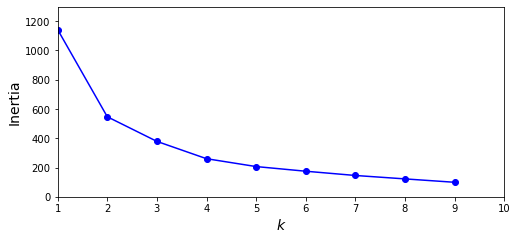

In [128]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias1, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 10, 0, 1300])
plt.show()

From this graph you can see that there is a sharp decline at K=3. 

After K=3, th inertia value does ot alter greatly (levels off).

We can then conclude that the optimal number of clusters for dataset alcohol_boundaries is 3 clusters based on this.

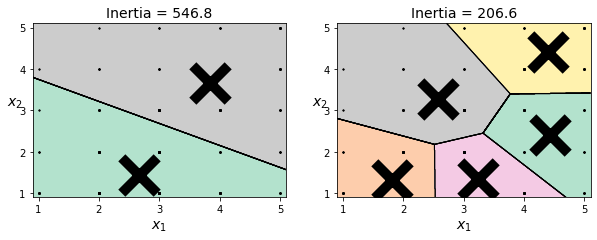

In [129]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_per_k1[2-1], alcohol_boundaries)
plt.title("Inertia = {:.1f}".format(kmeans_per_k1[2-1].inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_boundaries, alcohol_boundaries)
plt.title("Inertia = {:.1f}".format(kmeans_boundaries.inertia_), fontsize=14)
plt.show()

We can then visualise the decision boundaries based on the elbow methods calculations and compare it to the original data set when it had 5 clusters.

As discussed before when the number of clusters decreased, the inertia value increases, this shows that the elbow method in this case was not an effective method for calculating the optimal number of clusters.

### Silhouette Method

In [130]:
from sklearn.metrics import silhouette_score, silhouette_samples

#### Silhouette Samples

In [131]:
silhouette_sample = silhouette_samples(alcohol5, y_pred_cluster)

In [132]:
silhouette_sample_boundaries = silhouette_samples(alcohol_boundaries, y_pred_cluster_boundaries)

The silhouette scores for each samples can be calulated using silhouette_sample()

#### Silhouette Score 

In [133]:
silhouette_average = silhouette_score(alcohol5, y_pred_cluster)
silhouette_average

0.22390855774360569

In [134]:
silhouette_average_boundaries = silhouette_score(alcohol_boundaries, y_pred_cluster_boundaries)
silhouette_average_boundaries

0.5042123527335893

The silhouette_score() returns the mean coefficienet over all the samples from silhouette_samples().

The best value is 1 and the worst is -1. 0 value indicates an overlapping of clusters.

From this we can see that the silhouette_average has a poor coefficient score of 0.22 and silhouette_average_boundaries has an average coefficient score of 0.50.

#### Number of Clusters from the Silhouette Score

In [135]:
n_clusters_range = [2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters_range:
    cluster_kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    labels_cluster = cluster_kmeans.fit_predict(alcohol5)
    
    silhouette_avg = silhouette_score(alcohol5, labels_cluster)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.30660528541786414
For n_clusters = 3 The average silhouette_score is : 0.2203792396260505
For n_clusters = 4 The average silhouette_score is : 0.21857201665252432
For n_clusters = 5 The average silhouette_score is : 0.22390855774360569
For n_clusters = 6 The average silhouette_score is : 0.2252047675480867
For n_clusters = 7 The average silhouette_score is : 0.2064624863667262
For n_clusters = 8 The average silhouette_score is : 0.2062321062422632
For n_clusters = 9 The average silhouette_score is : 0.1974066807373409
For n_clusters = 10 The average silhouette_score is : 0.19171499207908296


From this we can see the number of clusters and how it would affect the silhouette score which would indicate which number of clusters produces the best silhouette score.

From this we can see that as the number of clusters increase, the silhouette score decreases and we can also see that n_clusters = 2 produces the best silhouette score closest to 1 indicating it is the most optimal.

In [136]:
n_clusters_range = [2,3,4,5,6,7,8,9,10]

for n_clusters_boundaries in n_clusters_range:
    cluster_kmeans_boundaries = KMeans(n_clusters = n_clusters_boundaries, random_state = 42)
    labels_cluster_boundaries = cluster_kmeans_boundaries.fit_predict(alcohol_boundaries)
    
    silhouette_avg_boundaries = silhouette_score(alcohol_boundaries, labels_cluster_boundaries)
    print(
        "For n_clusters_boundaries =",
        n_clusters_boundaries,
        "The average silhouette_score is :",
        silhouette_avg_boundaries,
    )

For n_clusters_boundaries = 2 The average silhouette_score is : 0.4770482279553029
For n_clusters_boundaries = 3 The average silhouette_score is : 0.4502114043704524
For n_clusters_boundaries = 4 The average silhouette_score is : 0.4893389118008524
For n_clusters_boundaries = 5 The average silhouette_score is : 0.5042123527335893
For n_clusters_boundaries = 6 The average silhouette_score is : 0.5067484683219868
For n_clusters_boundaries = 7 The average silhouette_score is : 0.5682014944457903
For n_clusters_boundaries = 8 The average silhouette_score is : 0.5826118641206594
For n_clusters_boundaries = 9 The average silhouette_score is : 0.6211826694244287
For n_clusters_boundaries = 10 The average silhouette_score is : 0.6865188148279757


From this we can see that as the number of clusters increase, the silhouette score increases also and we can also see that n_clusters = 10 produces the best silhouette score closest to 1 indicating it is the most optimal.

This is contrary to the dataset above.

## Comparing Different Clustering Algorithm

#### KMeans Clustering

##### Adjusted Rand Score

In [137]:
from sklearn.metrics.cluster import adjusted_rand_score

In [138]:
adjusted_rand_score(alcohol4["Dalc"], y_pred_cluster)

0.10402125072387805

In [139]:
adjusted_rand_score(alcohol4["Dalc"], y_pred_cluster_boundaries)

0.12695883853721848

If the value is close to 0, there is random labelling independent from the number of clusters and samples and if it is 1, then the clusterings are identical to the labels.

From this we can see that KMeans did not provide an accurate clustering as the value is nearer to 0 than 1.

#### GMM Clustering

##### Adjusted Rand Score

In [140]:
adjusted_rand_score(alcohol4["Dalc"], y_pred_cluster_gaussian)

0.30750595948960935

In [141]:
adjusted_rand_score(alcohol4["Dalc"], y_pred_cluster_gaussian_boundaries)

0.28936686712749754

From this we can see that GMM Clustering did not provide an accurate clustering as the value is nearer to 0 than 1, but it is more accurate in clustering than KMeans.

#### Agglomerative Hierarchical Clustering

##### Adjusted Rand Score

In [142]:
adjusted_rand_score(alcohol4["Dalc"], aggloClustering)

0.2869592833549153

In [143]:
adjusted_rand_score(alcohol4["Dalc"], aggloClusteringBoundaries)

0.25681078057890316

From this we can see that Agglomerative Hierarchical Clustering did not provide an accurate clustering as the value is nearer to 0 than 1, but it is more accurate in clustering than KMeans and less accurate than GMM.

#### Comparing to Bayesian Classification

##### Adjusted Rand Score

In [144]:
adjusted_rand_score(alcohol4["Dalc"], y_predict)

0.4302418031541505

From this we can see that Bayesian Classification did not provide an accurate clustering as the value is nearer to 0 than 1, but it is more accurate in clustering than KMeans, GMM and Hierarchical.

## Conclusion

From this we can see from the adjusted_rand_score that for my datasets that out of all the clustering methods, GMM is the best even though they're all weakly clustering. But Naive Bayes still provided the best adjusted_rand_score.

# Part 3 - Supervised Learning, Generalisation & Overfitting; Decision trees

## Test and Training set creation

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(alcohol5, alcohol4["Dalc"], test_size=0.33, random_state=42)

In [147]:
X_train, X_test

(     school  sex  address  famsize  freetime  goout  Walc
 172       0    1        1        1         4      4     3
 119       0    1        1        0         4      3     2
 389       1    0        1        0         1      1     1
 198       0    0        1        0         2      4     3
 139       0    0        1        0         3      2     1
 ..      ...  ...      ...      ...       ...    ...   ...
 71        0    1        1        0         3      3     1
 106       0    0        1        0         1      2     1
 270       0    0        1        0         3      5     3
 348       0    0        1        0         4      3     3
 102       0    1        1        0         3      3     1
 
 [264 rows x 7 columns],
      school  sex  address  famsize  freetime  goout  Walc
 78        0    1        1        0         5      1     1
 371       1    1        0        1         3      3     3
 248       0    1        0        1         3      3     3
 55        0    0        1   

In [148]:
y_train, y_test

(172    1
 119    1
 389    1
 198    2
 139    1
       ..
 71     1
 106    1
 270    3
 348    1
 102    1
 Name: Dalc, Length: 264, dtype: int64,
 78     1
 371    2
 248    1
 55     1
 390    4
       ..
 246    1
 239    3
 153    1
 261    1
 262    1
 Name: Dalc, Length: 131, dtype: int64)

From this we can see the values the variables X_train, X_test, y_test and y_train uphold.

##  Decision Tree and Cross Validation

Decision Trees are a type of classification tree with a leaf node being terminal and the root node being the start

### Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [150]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

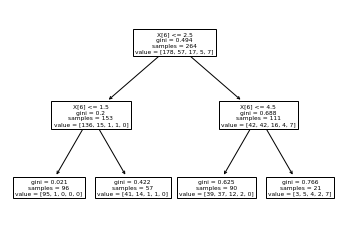

In [151]:
plot_tree(tree_clf);

A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

Fro this we can see the leftmost nodes have a gini of 0.2 and 0.021 meaning nearly all of its training instances it applied belong to the same class, whereas on the rightmost nodes we can see 0.766 and 0.688 for the values of gini indicating the majority of the instances applied do not belong to the same class

In [152]:
tree_clf.score(X_train, y_train)

0.6893939393939394

Using the score method on the train set and train labels from the Decision Tree Classifier we can calculate how accurate the classifier was. From this we can see it recorded a 69% accuracy.

### 10-Fold Cross Validation

In [153]:
cross_val_score(tree_clf, X_train, y_train, cv=10)

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.7037037 , 0.7037037 , 0.66666667, 0.7037037 , 0.69230769,
       0.69230769, 0.57692308, 0.73076923, 0.65384615, 0.69230769])

From this we can see the 10 scores produced by the cross_val_score. 

In [154]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="f1_macro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.37596899, 0.37596899, 0.17142857, 0.30340909, 0.17142857,
       0.2952381 , 0.42214156, 0.45930233, 0.25512821, 0.3375    ])

In [155]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="f1_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.7037037 , 0.7037037 , 0.66666667, 0.7037037 , 0.69230769,
       0.69230769, 0.57692308, 0.73076923, 0.65384615, 0.69230769])

In [156]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="recall_macro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5       , 0.5       , 0.2       , 0.31944444, 0.2       ,
       0.38888889, 0.47111111, 0.5       , 0.27696078, 0.5       ])

In [157]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="recall_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.7037037 , 0.7037037 , 0.66666667, 0.7037037 , 0.69230769,
       0.69230769, 0.57692308, 0.73076923, 0.65384615, 0.69230769])

In [158]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="precision_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.7037037 , 0.7037037 , 0.66666667, 0.7037037 , 0.69230769,
       0.69230769, 0.57692308, 0.73076923, 0.65384615, 0.69230769])

In [159]:
cross_val_score(tree_clf, X_train.values, y_train, cv=10, scoring ="precision_macro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eniol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

array([0.305     , 0.305     , 0.15      , 0.29318182, 0.15      ,
       0.24166667, 0.43896104, 0.43      , 0.24431818, 0.26811594])

F1-score also known as F-score is a measure of a models accuracy on a dataset.

From these metrics we can see that the _micro (f1_micro, recall_micro, precision_micro) is identical to the accuracy of the cross_val_score() calculated earlier and that the model is not completely accurate but it is not that bad at predicting with around 65 - 70% accuracy

We can also see that there are zero_division errors in recall and precision macros but that cant be changed.

## Decision Trees with Training and Test Set

In [160]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [161]:
y_predict_tree = tree_clf.predict(X_test)

In [162]:
accuracy_tree = accuracy_score(y_test, y_predict_tree)

In [163]:
print('Accuracy: %.3f' % (accuracy_tree * 100))

Accuracy: 75.573


From this we can see the accuracy when testing the classifier on the test set using the training set, with an accuracy score of 75.5%. 

We can then say that the decision tree generalizes well with the new data given the fact that it produced a moderately high accuracy score.

## Experimentation with Various Decision Tree Parameters

In [164]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

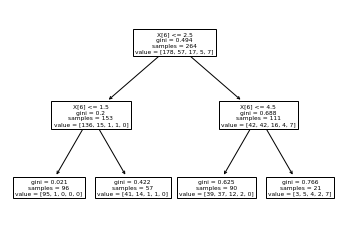

In [165]:
plot_tree(tree_clf);

In [166]:
tree_clf.score(X_train, y_train)

0.6893939393939394

The Decision Tree at the start of this section is used as a base so it can be used as a comparison when certain attributes like:

- Depth of Tree
- Splitting Criteria
- Minimal Number of Instances Permissible Per Leaf

#### Depth of Tree

##### max_depth = 1 

In [167]:
tree_clf_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_depth_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

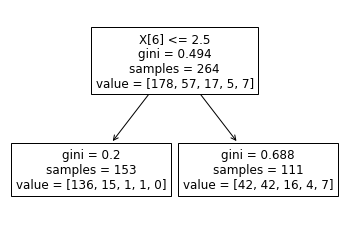

In [168]:
plot_tree(tree_clf_depth_1);

In [169]:
depth1 = tree_clf_depth_1.score(X_train, y_train)
depth1

0.6742424242424242

##### max_depth = 2

In [170]:
tree_clf_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_depth_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

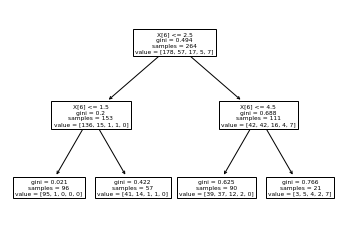

In [171]:
plot_tree(tree_clf_depth_2);

In [172]:
depth2 = tree_clf_depth_2.score(X_train, y_train)
depth2

0.6893939393939394

##### max_depth = 3

In [173]:
tree_clf_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_depth_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

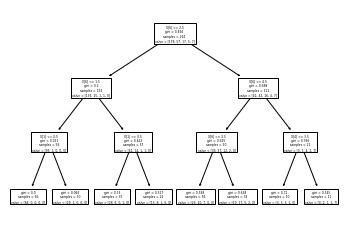

In [174]:
plot_tree(tree_clf_depth_3);

In [175]:
depth3 = tree_clf_depth_3.score(X_train, y_train)
depth3

0.7272727272727273

##### max_depth = 4

In [176]:
tree_clf_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_depth_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

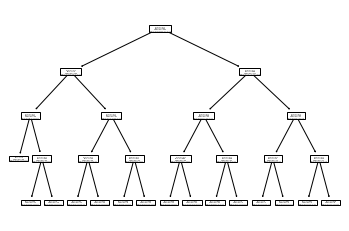

In [177]:
plot_tree(tree_clf_depth_4);

In [178]:
depth4 = tree_clf_depth_4.score(X_train, y_train)
depth4

0.7575757575757576

From this we can see that increasing the depth of the decision tree from 2 to 4, increased the score value.

##### max_depth = 5

In [179]:
tree_clf_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_depth_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

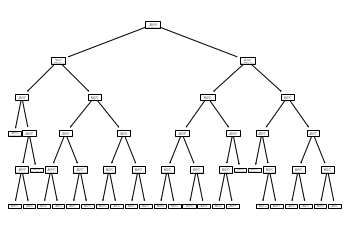

In [180]:
plot_tree(tree_clf_depth_5);

In [181]:
depth5 = tree_clf_depth_5.score(X_train, y_train)
depth5

0.7840909090909091

##### max_depth = 6

In [182]:
tree_clf_depth_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf_depth_6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

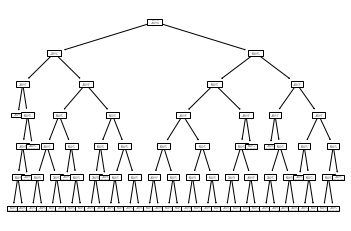

In [183]:
plot_tree(tree_clf_depth_6);

In [184]:
depth6 = tree_clf_depth_6.score(X_train, y_train)
depth6

0.8295454545454546

##### max_depth = 7

In [185]:
tree_clf_depth_7 = DecisionTreeClassifier(max_depth=7, random_state=42)
tree_clf_depth_7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

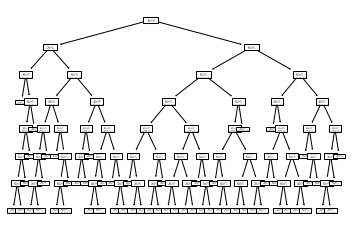

In [186]:
plot_tree(tree_clf_depth_7);

In [187]:
depth7 = tree_clf_depth_7.score(X_train, y_train)
depth7

0.8636363636363636

##### max_depth = 8

In [188]:
tree_clf_depth_8 = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf_depth_8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

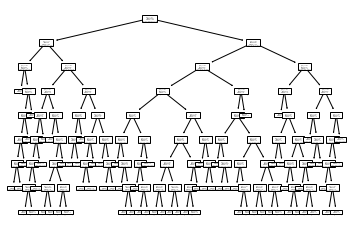

In [189]:
plot_tree(tree_clf_depth_8);

In [190]:
depth8 = tree_clf_depth_8.score(X_train, y_train)
depth8

0.8977272727272727

We can see from this that once again, the score increased when the max depth of the decision tree increased. We can then make an educated assumption that as the max_depth increases, the score increases also till it reaches 1.

But this data can be false, due to overfitting which may be present.

#### max_depth plot

In [191]:
scores_depth = [depth1, depth2, depth3, depth4, depth5, depth6, depth7, depth8]
max_depth_no = [1,2,3,4,5,6,7,8]

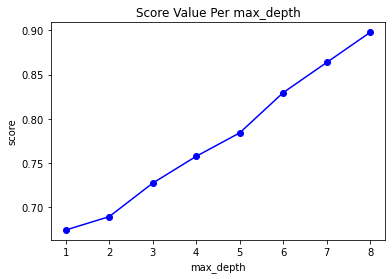

In [192]:
plt.plot(max_depth_no,scores_depth, "bo-")
plt.title('Score Value Per max_depth')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

From this when comparing max_depth value from 1 to 8, we can visulaise the increase in score, showing u=-

#### Splitting Criteria

In [193]:
tree_clf_split_random = DecisionTreeClassifier(max_depth=2, random_state=42, splitter= "random")
tree_clf_split_random.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42, splitter='random')

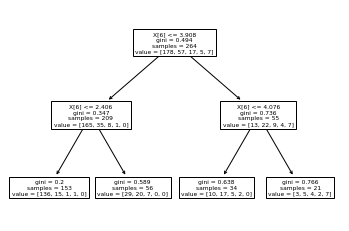

In [194]:
plot_tree(tree_clf_split_random);

In [195]:
tree_clf_split_random.score(X_train, y_train)

0.7159090909090909

When performing DecisionTreeClassifier, by default the splitter parameter is set to "best", to choose the best split.
Upon changing the splitter parameter to "random", the score can be compared between the splitting methods.

From this we can see that the random split this time produced a higher score than the best method.
But since this is random, it is not consistent.

#### Minimal Number of Instances Permissible Per Leaf

##### min_samples_leaf = 2

In [196]:
tree_clf_min_leaf_2 = DecisionTreeClassifier(max_depth=2, random_state=42, min_samples_leaf = 2)
tree_clf_min_leaf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

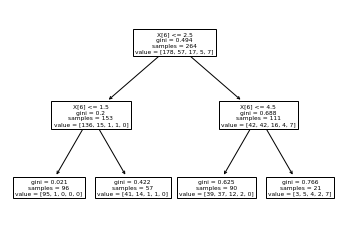

In [197]:
plot_tree(tree_clf_min_leaf_2);

In [198]:
tree_clf_min_leaf_2.score(X_train, y_train)

0.6893939393939394

##### min_samples_leaf = 4

In [199]:
tree_clf_min_leaf_4 = DecisionTreeClassifier(max_depth=2, random_state=42, min_samples_leaf = 4)
tree_clf_min_leaf_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=42)

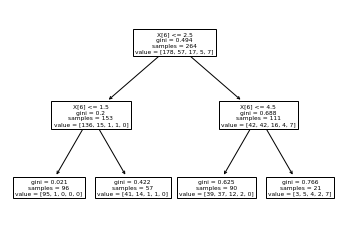

In [200]:
plot_tree(tree_clf_min_leaf_4);

In [201]:
tree_clf_min_leaf_4.score(X_train, y_train)

0.6893939393939394

From this we can see that changing the number of min_samples_leaf does not change the score of the DecisionTreeClassifier

## Changing the Split Percentage Between the Training and Test Set

### 30% Training and Test Split

In [202]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(alcohol5, alcohol4["Dalc"], test_size=0.30, random_state=42)

In [203]:
tree_clf_30 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_30.fit(X_train_30, y_train_30)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [204]:
tree_clf_30.score(X_train_30, y_train_30)

0.6956521739130435

Reducing the test_size from 33% to 30% improved the accuracy on the training set

In [205]:
y_predict_tree_30 = tree_clf_30.predict(X_test_30)

In [206]:
accuracy_tree_30 = accuracy_score(y_test_30, y_predict_tree_30)
print('Accuracy: %.3f' % (accuracy_tree_30 * 100))

Accuracy: 74.790


From this we can see that using the classifier on the test set, the accuracy reduced compared to the control DecisionTreeClassifier from 75.5% to 74.7%.

### 60% Training and Test Split

In [207]:
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(alcohol5, alcohol4["Dalc"], test_size=0.60, random_state=42)

In [208]:
tree_clf_60 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_60.fit(X_train_60, y_train_60)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [209]:
tree_clf_60.score(X_train_60, y_train_60)

0.7278481012658228

Increasing the split from 30 to 60 improved the accuracy on the training set

In [210]:
y_predict_tree_60 = tree_clf_60.predict(X_test_60)

In [211]:
accuracy_tree_60 = accuracy_score(y_test_60, y_predict_tree_60)
print('Accuracy: %.3f' % (accuracy_tree_60 * 100))

Accuracy: 71.308


From this we can see that using the classifier on the test set, the accuracy reduced compared to the control DecisionTreeClassifier from 75.5% to 71.3%.

### Overfitting

* (*) indicating all 

Reducing the max_* of the DecisionTreeClassifier and increasing the min_* of the DecisionTreeClassifier regularize the model. Regularization of the model results in a smaller tree which prevents overfitting.

Overfitting can reduce the accuracy on the model on the test dataset.

From 30% and 60% splits we can see that overfitting has not really occured during these splits.

If we look at when max_depth = 8, we can see a deep decision tree with a high score on the training set. Compare it with the test set score below:

In [212]:
y_predict_tree_8 = tree_clf_depth_8.predict(X_test)

In [213]:
accuracy_tree_8 = accuracy_score(y_test, y_predict_tree_8)
print('Accuracy: %.3f' % (accuracy_tree_8 * 100))

Accuracy: 64.122


As we can see here, compared to the training set score of 89% the test set score is 64%, which shows evidence of overfitting confirming our initial thoughts when manually altering the max_depth.

## Random Forest 

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
forest_clf = RandomForestClassifier(max_depth = 2, random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [216]:
forest_clf.score(X_train, y_train)

0.6742424242424242

The score from the RandomForestClassifier is ever so slightly lower than the score from DecisionTreeClassifier

0.67 compared to 0.68

### 10-Fold Cross Validation

In [217]:
cross_val_score(forest_clf, X_train, y_train, cv=10)

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.69230769,
       0.65384615, 0.69230769, 0.69230769, 0.65384615, 0.65384615])

In [218]:
cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="recall_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.69230769,
       0.65384615, 0.69230769, 0.69230769, 0.65384615, 0.65384615])

In [219]:
cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="precision_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.69230769,
       0.65384615, 0.69230769, 0.69230769, 0.65384615, 0.65384615])

In [220]:
cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="f1_micro")

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.69230769,
       0.65384615, 0.69230769, 0.69230769, 0.65384615, 0.65384615])

### Test and Training Set with Random Forest Classifier

In [221]:
y_predict_forest = forest_clf.predict(X_test)

In [222]:
accuracy_forest = accuracy_score(y_test, y_predict_forest)
print('Accuracy: %.3f' % (accuracy_forest * 100))

Accuracy: 74.809


Once again with the comparison of RandomForestClassifier and DecisionTreeClassifier, the accuracy is ever so slightly lower

74.8% compared to 75.5%

### Experimentation with Various Decision Tree Parameters

#### Max Depth

##### max_depth = 4

In [223]:
forest_clf_depth_4 = RandomForestClassifier(max_depth = 4, random_state = 42)
forest_clf_depth_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [224]:
forest_clf_depth_4.score(X_train, y_train)

0.7348484848484849

##### max_depth = 8

In [225]:
forest_clf_depth_8 = RandomForestClassifier(max_depth = 8, random_state = 42)
forest_clf_depth_8.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [226]:
forest_clf_depth_8.score(X_train, y_train)

0.9128787878787878

From this when changing the max_depth, we can see that the scores just like DecisionTreeClassifier increases. But with RandomForestClassifier, the increase of the score is higher than DecisionTreeClassifier. 

#### n_estimators

##### n_estimators = 200

In [227]:
forest_clf_estimator_200 = RandomForestClassifier(max_depth = 2, random_state = 42, n_estimators = 200)
forest_clf_estimator_200.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [228]:
forest_clf_estimator_200.score(X_train, y_train)

0.6742424242424242

##### n_estimators = 50

In [229]:
forest_clf_estimator_50 = RandomForestClassifier(max_depth = 2, random_state = 42, n_estimators = 50)
forest_clf_estimator_50.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)

In [230]:
forest_clf_estimator_50.score(X_train, y_train)

0.6742424242424242

From this we can see that the number of estimators does not change the RandomForestClassifiers score.

#### Minimal Number of Instances Permissible Per Leaf

##### min_samples_leaf = 2

In [231]:
forest_clf_min_leaf_2 = RandomForestClassifier(max_depth=2, random_state=42, min_samples_leaf = 2)
forest_clf_min_leaf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

In [232]:
forest_clf_min_leaf_2.score(X_train, y_train)

0.6742424242424242

##### min_samples_leaf = 4

In [233]:
forest_clf_min_leaf_4 = RandomForestClassifier(max_depth=2, random_state=42, min_samples_leaf = 4)
forest_clf_min_leaf_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=4, random_state=42)

In [234]:
forest_clf_min_leaf_4.score(X_train, y_train)

0.6742424242424242

From this we can see that changing the number of min_samples_leaf does not change the score of the RandomForestClassifier

### Changing the Split Percentage Between the Training and Test Set

#### 30% Training and Test Split

In [235]:
forest_clf_30 = RandomForestClassifier(max_depth=2, random_state=42)
forest_clf_30.fit(X_train_30, y_train_30)

RandomForestClassifier(max_depth=2, random_state=42)

In [236]:
forest_clf_30.score(X_train_30, y_train_30)

0.6811594202898551

In [237]:
y_predict_forest_30 = forest_clf_30.predict(X_test_30)

In [238]:
accuracy_forest_30 = accuracy_score(y_test_30, y_predict_forest_30)
print('Accuracy: %.3f' % (accuracy_forest_30 * 100))

Accuracy: 73.950


#### 60% Training and Test Split

In [239]:
forest_clf_60 = RandomForestClassifier(max_depth=2, random_state=42)
forest_clf_60.fit(X_train_60, y_train_60)

RandomForestClassifier(max_depth=2, random_state=42)

In [240]:
forest_clf_60.score(X_train_60, y_train_60)

0.6835443037974683

In [241]:
y_predict_forest_60 = forest_clf_60.predict(X_test_60)

In [242]:
accuracy_forest_60 = accuracy_score(y_test_60, y_predict_forest_60)
print('Accuracy: %.3f' % (accuracy_forest_60 * 100))

Accuracy: 70.886


From this we can see that changing the percentage of the split of the training set and the test set did not create a noticable differentiation between 30% and 60%.

With the scores on the training set being very similar and the accuracy on the test set being marginally different by 3%.

### Conclusion

Decision Trees Advantages and Disadvantages

Advantages

- Can perform well on large set
- Can handle both numerical and catergorical data
- Easy to intepret and can create simple visualizations

Disadvantages

- Decision trees are prone to overfitting as seen in above


Random Forest Advantages and Disadvantages

- Can handle both numerical and categorical data
- Automates missing values in the data
- Reduces overfitting compared to Decision Tree

From both the Decision Tree and Random Forest Classifiers on the dataset we can see that on the training set and also the test set, Decision Tree was slightly more accurate than the Random Forest.

# Part 3 - Neural Networks and Convolutional Neural Networks

## Logistic Regression without cross validation

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
regressionClassifier = LogisticRegression(random_state=0, max_iter = 298).fit(X_train, y_train)

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Due to a "lbfgs failed to converge (status=1):" 

The number of max_iter was increased from the default 100 to the lowest new max_iter that allows for logisticRegression. 

This value was 298
This to allow for convergance 

In [245]:
score = regressionClassifier.score(X_train, y_train);
score

0.7310606060606061

From this we can see the score of the logistic Regression without cross validation. 

With a score producing 73% accuracy

## Logistic Regression with cross validation

In [246]:
regressionClassifierCV = LogisticRegression(random_state=0, max_iter = 331).fit(X_train, y_train)

In [247]:
cross_val_score(regressionClassifierCV, X_train, y_train, cv=10)

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.62962963, 0.66666667, 0.7037037 , 0.62962963, 0.76923077,
       0.69230769, 0.61538462, 0.84615385, 0.73076923, 0.73076923])

Due to a "lbfgs failed to converge (status=1):" 

The number of max_iter was increased from the default 100 to the lowest new max_iter that allows for logisticRegression. 

This value was 331
This is to allow for convegance

We can also see the scores when the logistic regression is calculated using the cross validation score with the cross validation no. being 10, 10 scores are produced.

all within the similar range of the score value

## Logistic Regression on Test Data

In [248]:
regressionClassifier = LogisticRegression(random_state=0, max_iter = 298).fit(X_train, y_train)

C:\Users\eniol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
y_predict_regression = regressionClassifier.predict(X_test)

In [250]:
accuracy_regression = accuracy_score(y_test, y_predict_regression)

In [251]:
print('Accuracy: %.3f' % (accuracy_regression * 100))

Accuracy: 72.519


From this we can see that the linear classifier logistic Regression does pretty accurately to generalize the new data as seen with a 72.5% accuracy.

Linear Seperability

Total linear seperability is when the accurary of a linear classification model is 100%. Due to the score on the test data set and training data set both having scores of 73% and 72.5%. We can conclude that the dataset has high linear seperability.

## Multilayer Perceptron Neural Networks

### activation functions

#### activation = identity 

In [252]:
from sklearn.neural_network import MLPClassifier

In [253]:
mlpCLF_identity = MLPClassifier(random_state=1, max_iter=891, activation = "identity").fit(X_train, y_train)

Once again the max_iter had to be altered from default 100 to allow convergence

In [254]:
mlpIdentity = mlpCLF_identity.score(X_test, y_test)

#### activation = logistic

In [255]:
mlpCLF_logistic = MLPClassifier(random_state=1, max_iter=891, activation = "logistic").fit(X_train, y_train)

In [256]:
mlpLogistic = mlpCLF_logistic.score(X_test, y_test)

#### activation = tanh

In [257]:
mlpCLF_tanh = MLPClassifier(random_state=1, max_iter=891, activation = "tanh").fit(X_train, y_train)

In [258]:
mlpTanh = mlpCLF_tanh.score(X_test, y_test)

#### activation = relu

In [259]:
mlpCLF_relu = MLPClassifier(random_state=1, max_iter=891, activation = "relu").fit(X_train, y_train)

In [260]:
mlpRelu = mlpCLF_relu.score(X_test, y_test)

### Comparing activation functions

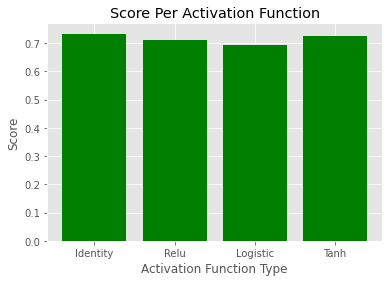

In [261]:
scoresMLP = [mlpIdentity, mlpRelu, mlpLogistic, mlpTanh]

plt.style.use('ggplot')

x = ['Identity', 'Relu', 'Logistic', 'Tanh']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, scoresMLP, color='green')
plt.xlabel("Activation Function Type")
plt.ylabel("Score")
plt.title("Score Per Activation Function")

plt.xticks(x_pos, x)

plt.show()

In [287]:
for scores in scoresMLP:
    print("Scores: ", scores);

Scores:  0.732824427480916
Scores:  0.7099236641221374
Scores:  0.6946564885496184
Scores:  0.7251908396946565


From this we can see that Logistic produces the worst score of 0.69 and Idenity produces the highest score of 0.73 meaning that logistic is the most effective parameter for producing the best score on this dataset.

### learning rate

#### constant

In [262]:
mlpCLF_constant = MLPClassifier(random_state=1, max_iter=891, learning_rate = "constant").fit(X_train, y_train)

In [263]:
mlpConstant = mlpCLF_constant.score(X_test, y_test)

#### invscaling

In [264]:
mlpCLF_invscaling = MLPClassifier(random_state=1, max_iter=891, learning_rate = "invscaling").fit(X_train, y_train)

In [265]:
mlpInvscaling = mlpCLF_invscaling.score(X_test, y_test)

#### adaptive

In [266]:
mlpCLF_adaptive = MLPClassifier(random_state=1, max_iter=891, learning_rate = "adaptive").fit(X_train, y_train)

In [267]:
mlpAdaptive = mlpCLF_adaptive.score(X_test, y_test)

### Comparing different learning rates

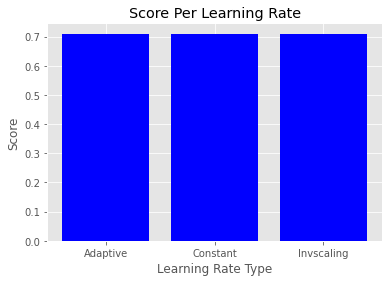

In [268]:
scoresLearning = [mlpAdaptive, mlpInvscaling, mlpConstant]

plt.style.use('ggplot')

x = ['Adaptive', 'Constant', 'Invscaling']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, scoresLearning, color='blue')
plt.xlabel("Learning Rate Type")
plt.ylabel("Score")
plt.title("Score Per Learning Rate")

plt.xticks(x_pos, x)

plt.show()

In [269]:
for scores in scoresLearning:
    print("Scores: ", scores);

Scores:  0.7099236641221374
Scores:  0.7099236641221374
Scores:  0.7099236641221374


From this we can see that all the learning rates on this dataset produce a score of 0.7 meaning that in this case the learning rate does not affect the score produced on this dataset.

### momentum 

In [270]:
n_momentum_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for n_momentum in n_momentum_range:
    mlpCLF_momentum = MLPClassifier(random_state=1, max_iter=1300,solver = "sgd", momentum = n_momentum)
    mlpCLF_momentum_fit = mlpCLF_momentum.fit(X_train, y_train)
    
    mlpCLF_score = mlpCLF_momentum_fit.score(X_test, y_test)
    print(
        "For n_momentum =",
        n_momentum,
        "The score is :",
        mlpCLF_score,
    )

For n_momentum = 0.1 The score is : 0.7175572519083969
For n_momentum = 0.2 The score is : 0.7175572519083969
For n_momentum = 0.3 The score is : 0.7175572519083969
For n_momentum = 0.4 The score is : 0.7099236641221374
For n_momentum = 0.5 The score is : 0.7022900763358778
For n_momentum = 0.6 The score is : 0.6870229007633588
For n_momentum = 0.7 The score is : 0.6946564885496184
For n_momentum = 0.8 The score is : 0.7099236641221374
For n_momentum = 0.9 The score is : 0.7251908396946565
For n_momentum = 1.0 The score is : 0.7175572519083969


From this we can see that on the dataset the momentum affects the score of the MLP. with momentum of 0.4 to 0.8 and 1 reducing the score of the MLP. given that default momentum is 0.9.

This means that the default is the best parameter.

### Validation_fraction

In [271]:
n_validation_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for n_validation in n_validation_range:
    mlpCLF_validation = MLPClassifier(random_state=1, max_iter=1300, early_stopping = True, validation_fraction = n_validation)
    mlpCLF_validation_fit = mlpCLF_validation.fit(X_train, y_train)
    
    mlpCLF_score_validation = mlpCLF_validation_fit.score(X_test, y_test)
    print(
        "For n_validation =",
        n_validation,
        "The score is :",
        mlpCLF_score_validation,
    )

For n_validation = 0.1 The score is : 0.7251908396946565
For n_validation = 0.2 The score is : 0.732824427480916
For n_validation = 0.3 The score is : 0.7404580152671756
For n_validation = 0.4 The score is : 0.7404580152671756
For n_validation = 0.5 The score is : 0.7404580152671756
For n_validation = 0.6 The score is : 0.7404580152671756
For n_validation = 0.7 The score is : 0.7404580152671756
For n_validation = 0.8 The score is : 0.7404580152671756
For n_validation = 0.9 The score is : 0.7480916030534351


From this we can see the validation fraction (threshold) affects the score of MLP. from this we can see that as the n_validation increases, the score increases also.

### hidden layer sizes

altering the hidden layer subsqeuntly alters the number of layers of the MLP.

Layers in MLP:

- Input Layer = 1
- len(hidden_layer_sizes)
- Output Layer = 1

#### hidden layer = 2

In [272]:
mlpCLF_hidden = MLPClassifier(random_state=1, max_iter=891, hidden_layer_sizes = (100,100,)).fit(X_train, y_train)

In [273]:
mlpCLF_hidden.score(X_test, y_test)

0.7099236641221374

#### hidden layer = 3

In [274]:
mlpCLF_hidden_3 = MLPClassifier(random_state=1, max_iter=891, hidden_layer_sizes = (100,100,100,)).fit(X_train, y_train)

In [275]:
mlpCLF_hidden_3.score(X_test, y_test)

0.6946564885496184

#### hidden layer = 4

In [276]:
mlpCLF_hidden_4 = MLPClassifier(random_state=1, max_iter=891, hidden_layer_sizes = (100,100,100,100)).fit(X_train, y_train)

In [277]:
mlpCLF_hidden_4.score(X_test, y_test)

0.7022900763358778

#### hidden layer = 5 

In [278]:
mlpCLF_hidden_5 = MLPClassifier(random_state=1, max_iter=891, hidden_layer_sizes = (100,100,100,100,100)).fit(X_train, y_train)

In [279]:
mlpCLF_hidden_5.score(X_test, y_test)

0.7022900763358778

#### hidden layer = 6

In [280]:
mlpCLF_hidden_6 = MLPClassifier(random_state=1, max_iter=891, hidden_layer_sizes = (100,100,100,100,100,100)).fit(X_train, y_train)

In [281]:
mlpCLF_hidden_6.score(X_test, y_test)

0.7175572519083969

From this we can see that the hidden layer affects the number of layers in MLP and subsequently the MLP score. 

We can also see that even though there are some fluctuations in the score, generally speaking, as the number of hidden layers increase so to does the score.

From these experiments, in general MLP on the dataset as a whole (trained on the training set and tested on the test set) is fairly effective on generalizing new data.

## Convolutional Neural Networks 

In [282]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [304]:
X_train.shape

(264, 7)

### Build the Model

In [316]:
model_base = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [317]:
model_base.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [318]:
model_base.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 887us/step - loss: 1.8429 - accuracy: 0.2273
Epoch 2/10
9/9 [==============================] - 0s 780us/step - loss: 1.3205 - accuracy: 0.5114
Epoch 3/10
9/9 [==============================] - 0s 776us/step - loss: 1.1181 - accuracy: 0.6667
Epoch 4/10
9/9 [==============================] - 0s 997us/step - loss: 1.0603 - accuracy: 0.6742
Epoch 5/10
9/9 [==============================] - 0s 669us/step - loss: 1.0130 - accuracy: 0.6667
Epoch 6/10
9/9 [==============================] - 0s 891us/step - loss: 0.9823 - accuracy: 0.6629
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9579 - accuracy: 0.6856
Epoch 8/10
9/9 [==============================] - 0s 886us/step - loss: 0.9331 - accuracy: 0.6780
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9148 - accuracy: 0.6780
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 0.8999 - accuracy: 0.6856


### Evaluate the model

In [319]:
test_loss_base, test_acc_base = model_base.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_base)


Test accuracy: 0.732824444770813


From this we can see the test accuracy when the model is tested on the test set. With an accuracy of 73%

### Changing the number of Epochs

In [315]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [312]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [407]:
n_epochs_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15];
test_acc_scores = [];

for epochs_no in n_epochs_range:
    model.fit(x=X_train,y=y_train,epochs=epochs_no)
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
    
    print();
    print("No of epochs: ", epochs_no)
    print("test score accuracy: ", test_acc);
    print();
    test_acc_scores.append(test_acc);

print(test_acc_scores);
    

9/9 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7879

No of epochs:  1
test score accuracy:  0.7175572514533997

Epoch 1/2
9/9 [==============================] - 0s 998us/step - loss: 0.5406 - accuracy: 0.7992
Epoch 2/2
9/9 [==============================] - 0s 997us/step - loss: 0.5362 - accuracy: 0.7955

No of epochs:  2
test score accuracy:  0.7022900581359863

Epoch 1/3
9/9 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7841
Epoch 2/3
9/9 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.8068
Epoch 3/3
9/9 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7955

No of epochs:  3
test score accuracy:  0.7175572514533997

Epoch 1/4
9/9 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7955
Epoch 2/4
9/9 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7917
Epoch 3/4
9/9 [==============================] - 0s 1ms/step - los

Epoch 1/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.8258
Epoch 2/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8220
Epoch 3/13
9/9 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8220
Epoch 4/13
9/9 [==============================] - 0s 997us/step - loss: 0.4832 - accuracy: 0.8144
Epoch 5/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8258
Epoch 6/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8258
Epoch 7/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.8258
Epoch 8/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.8295
Epoch 9/13
9/9 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.8258
Epoch 10/13
9/9 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.8182
Epoch 11/13
9/9 [====================

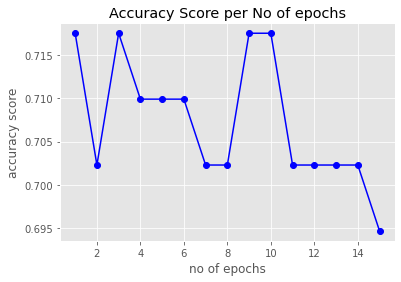

In [408]:
plt.plot(n_epochs_range, test_acc_scores, "bo-")
plt.title('Accuracy Score per No of epochs')
plt.xlabel('no of epochs')
plt.ylabel('accuracy score')
plt.show()

From this we can see the effects of changing the epoch number.
We can see that there is not really a general trend upon the change of these values. But we can see the optimum numbers of epochs is 1, 3, 9 and 10 producing the best accuracy scores whereas 15 produce the worst accuracy scores.

### Fully Connected CNN altering

#### Altering the number of dense layers

##### no of dense layers = 2

In [320]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [321]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [409]:
model.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8295
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8258
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8258
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8258
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8220
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8295
Epoch 7/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8258
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8220
Epoch 9/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8182
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8295


In [410]:
test_loss, test_acc2 = model.evaluate(X_test,  y_test, verbose=0)

##### no of dense layers = 4

In [324]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [411]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [413]:
model1.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7500
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.7348
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7462
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7538
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.7538
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7652
Epoch 7/10
9/9 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.7500
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7689
Epoch 9/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.7576
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7538


In [414]:
test_loss, test_acc4 = model.evaluate(X_test,  y_test, verbose=0)

##### no of dense layers = 6

In [328]:
model2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [329]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [416]:
model2.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7348
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7311
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.7045
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.7121
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7500
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7500
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7424
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7462
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7614


In [417]:
test_loss, test_acc6 = model.evaluate(X_test,  y_test, verbose=0)

##### no of dense layers = 8

In [332]:
model3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [333]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [419]:
model3.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.7197
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.7311
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7311
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7235
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7424
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7424
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7008
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7348
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7500
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7614


In [420]:
test_loss, test_acc8 = model.evaluate(X_test,  y_test, verbose=0)

### Visualising the comparison

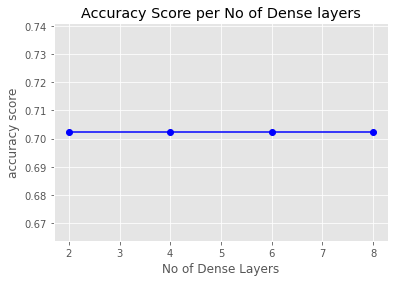

[0.7022900581359863,
 0.7022900581359863,
 0.7022900581359863,
 0.7022900581359863]

In [421]:
test_acc_score_dense = [test_acc2, test_acc4, test_acc6, test_acc8];
n_dense_layers = [2,4,6,8];


plt.plot(n_dense_layers, test_acc_score_dense, "bo-")
plt.title('Accuracy Score per No of Dense layers')
plt.xlabel('No of Dense Layers')
plt.ylabel('accuracy score')
plt.show()

test_acc_score_dense

From this, we can see that in a fully connected network, altering the number of dense layers on this dataset does not affect the score value. Usually an overuse of dense layers can lead to overfitting, but in this case the change from 2 to 8 did not affect the accuracy score.

### Convolutional Layer

In [341]:
X_train.shape

(264, 1, 7)

In [342]:
X_test.shape

(131, 1, 7)

In [340]:
X_train = X_train.values.reshape(264, 1, 7)
X_test = X_test.values.reshape(131, 1, 7)

In [343]:
X_train.shape, X_test.shape

((264, 1, 7), (131, 1, 7))

#### Convolutional Layer = 1

In [422]:
model1conv = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(128 , 1, activation='relu', input_shape=X_train.shape),
     tf.keras.layers.Dense(6, activation='softmax')])

model1conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1conv.summary();        

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 264, 1, 128)       1024      
_________________________________________________________________
dense_54 (Dense)             (None, 264, 1, 6)         774       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [434]:
model1conv.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 997us/step - loss: 0.8074 - accuracy: 0.6818
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7991 - accuracy: 0.6894
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7940 - accuracy: 0.6894
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7864 - accuracy: 0.6932
Epoch 5/5
9/9 [==============================] - 0s 891us/step - loss: 0.7839 - accuracy: 0.7083


In [435]:
test_loss_conv, test_acc_conv = model1conv.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_conv)


Test accuracy: 0.6717557311058044


#### Convolutional Layer = 2

In [429]:
model2conv = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(128 , 1, activation='relu', input_shape=X_train.shape),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model2conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2conv.summary();  

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 264, 1, 128)       1024      
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 264, 1, 64)        8256      
_________________________________________________________________
dense_55 (Dense)             (None, 264, 1, 6)         390       
Total params: 9,670
Trainable params: 9,670
Non-trainable params: 0
_________________________________________________________________


In [436]:
model2conv.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7921 - accuracy: 0.7083
Epoch 2/5
9/9 [==============================] - 0s 997us/step - loss: 0.7789 - accuracy: 0.7235
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7617 - accuracy: 0.7311
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7629 - accuracy: 0.7045
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.7418 - accuracy: 0.7197


In [437]:
test_loss_conv1, test_acc_conv1 = model2conv.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_conv1)


Test accuracy: 0.7251908183097839


#### Convolutional Layer = 3

In [354]:
model3conv = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(128 , 1, activation='relu', input_shape=X_train.shape),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model3conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3conv.summary();  

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 264, 1, 128)       1024      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 264, 1, 64)        8256      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 264, 1, 64)        4160      
_________________________________________________________________
dense_44 (Dense)             (None, 264, 1, 6)         390       
Total params: 13,830
Trainable params: 13,830
Non-trainable params: 0
_________________________________________________________________


In [456]:
model3conv.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.7689
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.8030
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.7955
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7803
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7955


In [457]:
test_loss_conv2, test_acc_conv2 = model3conv.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_conv2)


Test accuracy: 0.7251908183097839


#### Convolutional Layer = 4

In [358]:
model4conv = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(128 , 1, activation='relu', input_shape=X_train.shape),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model4conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4conv.summary();  

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 264, 1, 128)       1024      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 264, 1, 64)        8256      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 264, 1, 64)        4160      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 264, 1, 64)        4160      
_________________________________________________________________
dense_45 (Dense)             (None, 264, 1, 6)         390       
Total params: 17,990
Trainable params: 17,990
Non-trainable params: 0
_________________________________________________________________


In [480]:
model4conv.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8523
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8447
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8523
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8523
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8333


In [481]:
test_loss_conv3, test_acc_conv3 = model4conv.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_conv3)


Test accuracy: 0.7022900581359863


#### Convolutional Layer = 5

In [363]:
model5conv = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(128 , 1, activation='relu', input_shape=X_train.shape),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Conv1D(64 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model5conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5conv.summary(); 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 264, 1, 128)       1024      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 264, 1, 64)        8256      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 264, 1, 64)        4160      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 264, 1, 64)        4160      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 264, 1, 64)        4160      
_________________________________________________________________
dense_46 (Dense)             (None, 264, 1, 6)         390       
Total params: 22,150
Trainable params: 22,150
Non-trainable params: 0
_________________________________________________

In [493]:
model5conv.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7765
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7576
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7614
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7576
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7538


In [494]:
test_loss_conv4, test_acc_conv4 = model5conv.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_conv4)


Test accuracy: 0.732824444770813


### Visualising Convolutional Layers

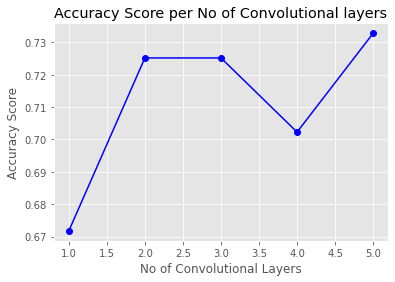

In [495]:
conv_layers_range = [1,2,3,4,5]
conv_layers_scores = [test_acc_conv, test_acc_conv1, test_acc_conv2, test_acc_conv3, test_acc_conv4];

plt.plot(conv_layers_range, conv_layers_scores, "bo-")
plt.title('Accuracy Score per No of Convolutional layers')
plt.xlabel('No of Convolutional Layers')
plt.ylabel('Accuracy Score')
plt.show()

From this we can see that ass the number of convolutional layers increase so to does the accuracy score as a general trend but it is not a linear increase. But this could also be due to overfitting.

### Pooling

The number of max pooling was then altered to see if it would affect the test accuracy of the dataset. For this testing, the input layer is only the input shape. With Convolutional layer and a dense layer following.

The input shape is just the shape of the dataset

#### MaxPooling = 1

In [369]:
model1pool = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape = (264,7)),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.Conv1D(128 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model1pool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1pool.summary();

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d (MaxPooling1D) (None, 264, 7)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 264, 128)          1024      
_________________________________________________________________
dense_47 (Dense)             (None, 264, 6)            774       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [496]:
model1pool.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 2ms/step - loss: 0.9380 - accuracy: 0.6629
Epoch 2/5
9/9 [==============================] - 0s 997us/step - loss: 0.9221 - accuracy: 0.6629
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.9047 - accuracy: 0.6742
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8876 - accuracy: 0.6742
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8770 - accuracy: 0.6780


In [497]:
test_loss_pool1, test_acc_pool1 = model1pool.evaluate(X_test,  y_test, verbose=0)

#### MaxPooling = 2

In [376]:
model2pool = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape = (264,7)),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.Conv1D(128 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model2pool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2pool.summary();

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d_1 (MaxPooling1 (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 264, 7)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 264, 128)          1024      
_________________________________________________________________
dense_48 (Dense)             (None, 264, 6)            774       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [498]:
model2pool.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 944us/step - loss: 0.8813 - accuracy: 0.6742
Epoch 2/5
9/9 [==============================] - 0s 997us/step - loss: 0.8679 - accuracy: 0.7008
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.6970
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8451 - accuracy: 0.6970
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8364 - accuracy: 0.6818


In [499]:
test_loss_pool2, test_acc_pool2 = model2pool.evaluate(X_test,  y_test, verbose=0)

#### MaxPooling = 3

In [388]:
model3pool = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape = (264,7)),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.Conv1D(128 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model3pool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3pool.summary();

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d_10 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 264, 128)          1024      
_________________________________________________________________
dense_51 (Dense)             (None, 264, 6)            774       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [500]:
model3pool.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8695 - accuracy: 0.7008
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8553 - accuracy: 0.7008
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8371 - accuracy: 0.7008
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8298 - accuracy: 0.6894
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8146 - accuracy: 0.7045


In [501]:
test_loss_pool3, test_acc_pool3 = model3pool.evaluate(X_test,  y_test, verbose=0)

#### MaxPooling = 4

In [393]:
model4pool = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape = (264,7)),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.Conv1D(128 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model4pool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4pool.summary();

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d_13 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 264, 128)          1024      
_________________________________________________________________
dense_52 (Dense)             (None, 264, 6)            774       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
___________________________________________________

In [502]:
model4pool.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 998us/step - loss: 0.8620 - accuracy: 0.6932
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8540 - accuracy: 0.6894
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8354 - accuracy: 0.6932
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8299 - accuracy: 0.6818
Epoch 5/5
9/9 [==============================] - 0s 886us/step - loss: 0.8204 - accuracy: 0.6894


In [503]:
test_loss_pool4, test_acc_pool4 = model4pool.evaluate(X_test,  y_test, verbose=0)

#### MaxPooling = 5

In [397]:
model5pool = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape = (264,7)),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.MaxPooling1D(1),
     tf.keras.layers.Conv1D(128 , 1, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')])

model5pool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5pool.summary();

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d_17 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 264, 7)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 264, 128)          1024      
_________________________________________________________________
dense_53 (Dense)             (None, 264, 6)          

In [504]:
model5pool.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8779 - accuracy: 0.6894
Epoch 2/5
9/9 [==============================] - 0s 997us/step - loss: 0.8653 - accuracy: 0.6970
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8519 - accuracy: 0.6818
Epoch 4/5
9/9 [==============================] - 0s 885us/step - loss: 0.8420 - accuracy: 0.6818
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.8325 - accuracy: 0.6932


In [505]:
test_loss_pool5, test_acc_pool5 = model5pool.evaluate(X_test,  y_test, verbose=0)

### Visualizing MaxPooling alterations

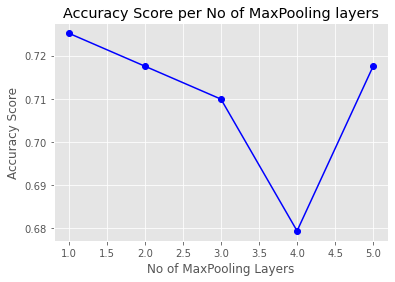

In [506]:
test_acc_pools = [test_acc_pool1, test_acc_pool2, test_acc_pool3, test_acc_pool4, test_acc_pool5]
no_pools_range = [1,2,3,4,5]

plt.plot(no_pools_range, test_acc_pools, "bo-")
plt.title('Accuracy Score per No of MaxPooling layers')
plt.xlabel('No of MaxPooling Layers')
plt.ylabel('Accuracy Score')
plt.show()

Each of the MaxPooling1D layers had a parameter pool size of one. 
As you can see from this graph, there is a general trend that is the number of MaxPooling1D layers increased, the accuracy test score on the test data set decreased wwith the exception of layer 5. although there is what I can describe as inconsistent results

## Conclusion

MLP

Advantages 

- fully connected neural network

Disadvantages

- Can only work in linearly seperable 

CNN

Advantages 
- Faster than MLP
- More accurate than MLP

Disadvantages 
- More complex than MLP
- Slower Performance on Very Large Datasets 

Comparing the two ANNs on the the dataset.
From these two ANNs we can see that in general if we compare MLP and CNN with the activation method "relu":

In [507]:
print('\nTest accuracy CNN: ', test_acc_base);
print('\nTest accuracy MLP: ', mlpRelu);


Test accuracy CNN:  0.732824444770813

Test accuracy MLP:  0.7099236641221374


We can see that CNN is more accurate than MLP on the test dataset when trained on the training model

# Citation

Part 1

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian#sklearn.naive_bayes.GaussianNB

https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

https://www.kdnuggets.com/2020/08/getting-started-feature-selection.html

https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

Part 2

https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit

https://scikit-learn.org/stable/modules/mixture.html#mixture

https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Part 3 

https://stackoverflow.com/questions/55667169/key-error-none-of-int64index-dtype-int64-are-in-the-columns

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=fold#sklearn.model_selection.KFold

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train#sklearn.model_selection.train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

https://machinelearningmastery.com/train-to-the-test-set-in-machine-learning/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991

Part 4

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

https://benalexkeen.com/bar-charts-in-matplotlib/

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://stackoverflow.com/questions/44978768/how-do-i-shape-my-input-data-for-use-with-conv1d-in-keras

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

https://keras.io/api/layers/convolution_layers/convolution1d/

https://keras.io/api/layers/pooling_layers/max_pooling1d/